In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("PerfectData.csv")

In [4]:
data

MORPH_ICD10_O2 BEHAVIOUR_ICD10_O2 T_BEST  N_BEST M_BEST GRADE  AGE  \
0            8140.0          MALIGNANT      4     2.0     1b    GX   59   
1            8140.0          MALIGNANT      4     2.0     1b    GX   59   
2            8140.0          MALIGNANT     2a     0.0      0    G3   54   
3            8140.0          MALIGNANT     2a     0.0      0    G3   54   
4            8140.0          MALIGNANT     2a     0.0      0    G3   54   
..              ...                ...    ...     ...    ...   ...  ...   
945          9861.0          MALIGNANT     1a     0.0      0    GX   75   
946          9861.0          MALIGNANT     1a     0.0      0    GX   75   
947          9861.0          MALIGNANT     1a     0.0      0    GX   75   
948          9861.0          MALIGNANT     1a     0.0      0    GX   75   
949          9861.0          MALIGNANT     1a     0.0      0    GX   75   

        SEX CANCERCAREPLANINTENT CNS  ...   CLINICAL_TRIAL CHEMO_RADIATION  \
0    FEMALE  No active treatment  Y1  ...  Not Taking Part              NO   
1    FEMALE  No active treatment  Y1  ...  Not Taking Part              NO   
2      MALE             Curative  Y1  ...  Not Taking Part              NO   
3      MALE             Curative  Y1  ...  Not Taking Part              NO   
4      MALE             Curative  Y1  ...  Not Taking Part              NO   
..      ...                  ...  ..  ...              ...             ...   
945    MALE         Non Curative  99  ...  Not Taking Part              NO   
946    MALE         Non Curative  99  ...  Not Taking Part              NO   
947    MALE         Non Curative  99  ...  Not Taking Part              NO   
948    MALE         Non Curative  99  ...  Not Taking Part              NO   
949    MALE         Non Curative  99  ...  Not Taking Part              NO   

     REGIMEN_MOD_TIME_DELAY  REGIMEN_MOD_STOPPED_EARLY  \
0                       YES                         NO   
1                       YES                         NO   
2                        NO                         NO   
3                        NO                         NO   
4                        NO                         NO   
..                      ...                        ...   
945                      NO                         NO   
946                      NO                         NO   
947                      NO                         NO   
948                      NO                         NO   
949                      NO                         NO   

    REGIMEN_OUTCOME_SUMMARY CYCLE_NUMBER ACTUAL_DOSE_PER_ADMINISTRATION  \
0                       0.0            1                          200.0   
1                       0.0            1                           10.0   
2                       0.0            1                          130.0   
3                       0.0            1                          210.0   
4                       0.0            2                           10.0   
..                      ...          ...                            ...   
945                     0.0            4                          240.0   
946                     0.0            4                            8.0   
947                     0.0            4                          120.0   
948                     0.0            3                          950.0   
949                     0.0            3                          330.0   

    ADMINISTRATION_ROUTE   DRUG_GROUP  diff  
0                      1    ETOPOSIDE    70  
1                      2    NOT CHEMO    70  
2                      1    ETOPOSIDE   165  
3                      1    ETOPOSIDE   165  
4                      2    NOT CHEMO   165  
..                   ...          ...   ...  
945                    1      STEROID   191  
946                    1      STEROID   191  
947                    1    DOCETAXEL   191  
948                    1  CARBOPLATIN   191  
949                    1  CARBOPLATIN   191  

[950 rows x 25 c

In [5]:
data= data.rename(columns={"MORPH_ICD10_O2":"Morph","BEHAVIOUR_ICD10_O2":"Behaviour","T_BEST": "T Best",
                          "N_BEST" : "N Best", "M_BEST" : "M Best", "GRADE" : "Grade", "AGE" : "Age",
                          "SEX":"Sex","CANCERCAREPLANINTENT":"Cancer Plan", "NEWVITALSTATUS" : "Vital Status",
                          "HEIGHT_AT_START_OF_REGIMEN":"Height","WEIGHT_AT_START_OF_REGIMEN":"Weight","MAPPED_REGIMEN":"Regimen","CLINICAL_TRIAL":"Clinical Trial",
                          "CHEMO_RADIATION":"Chemo Radiation","REGIMEN_MOD_TIME_DELAY":"Regimen Time Delay","REGIMEN_MOD_STOPPED_EARLY":"Regimen Stopped Early",
                          "REGIMEN_OUTCOME_SUMMARY":"Outcome","CYCLE_NUMBER":"Cycle","ACTUAL_DOSE_PER_ADMINISTRATION":"Dose Administration",
                           "ADMINISTRATION_ROUTE":"Administration Route", "DRUG_GROUP":"Drug Group","ACE27":"ACE"})


In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

from sklearn.preprocessing import OneHotEncoder

In [7]:
data['Vital Status'].value_counts()

D    615
A    335
Name: Vital Status, dtype: int64

In [8]:
data = data.rename(columns={"Vital Status":"Alive"})
data = data.drop(["Alive"], axis = 1)
data = data.drop(["Behaviour"], axis = 1)

In [9]:
cat_vars = data.columns.tolist()
cat_vars.remove("Height")
cat_vars.remove("Weight")
cat_vars.remove("Morph")
cat_vars.remove("Age")
cat_vars.remove("Cycle")
cat_vars.remove("Dose Administration")
cat_vars.remove("diff")
cat_vars

['T Best',
 'N Best',
 'M Best',
 'Grade',
 'Sex',
 'Cancer Plan',
 'CNS',
 'ACE',
 'Regimen',
 'Clinical Trial',
 'Chemo Radiation',
 'Regimen Time Delay',
 'Regimen Stopped Early',
 'Outcome',
 'Administration Route',
 'Drug Group']

In [10]:
temp = data['Behaviour']
temp

KeyError: 'Behaviour'

In [11]:
temp = temp.drop_duplicates()
temp

NameError: name 'temp' is not defined

In [10]:
num_vars = ["diff","Height","Weight","Morph","Age","Cycle","Dose Administration"]

In [16]:
data_final = data.copy()
X_cat = data_final.drop(columns=["diff"]) #for SHAP
dete = pd.get_dummies(data_final)
dete

Morph  N Best  Age  ACE  Height  Weight  Outcome  Cycle  \
0    8140.0     2.0   59    0    1.70    76.3      0.0      1   
1    8140.0     2.0   59    0    1.70    76.3      0.0      1   
2    8140.0     0.0   54    9    1.48    52.3      0.0      1   
3    8140.0     0.0   54    9    1.48    52.3      0.0      1   
4    8140.0     0.0   54    9    1.48    52.3      0.0      2   
..      ...     ...  ...  ...     ...     ...      ...    ...   
945  9861.0     0.0   75    1    1.72    69.0      0.0      4   
946  9861.0     0.0   75    1    1.72    69.0      0.0      4   
947  9861.0     0.0   75    1    1.72    69.0      0.0      4   
948  9861.0     0.0   75    1    1.72    69.0      0.0      3   
949  9861.0     0.0   75    1    1.72    69.0      0.0      3   

     Dose Administration  Administration Route  ...  Drug Group_NOT MATCHED  \
0                  200.0                     1  ...                       0   
1                   10.0                     2  ...                       0   
2                  130.0                     1  ...                       0   
3                  210.0                     1  ...                       0   
4                   10.0                     2  ...                       0   
..                   ...                   ...  ...                     ...   
945                240.0                     1  ...                       0   
946                  8.0                     1  ...                       0   
947                120.0                     1  ...                       0   
948                950.0                     1  ...                       0   
949                330.0                     1  ...                       0   

     Drug Group_OXALIPLATIN  Drug Group_PACLITAXEL  Drug Group_PEMBROLIZUMAB  \
0                         0                      0                         0   
1                         0                      0                         0   
2                         0                      0                         0   
3                         0                      0                         0   
4                         0                      0                         0   
..                      ...                    ...                       ...   
945                       0                      0                         0   
946                       0                      0                         0   
947                       0                      0                         0   
948                       0                      0                         0   
949                       0                      0                         0   

     Drug Group_PEMETREXED  Drug Group_STEROID  Drug Group_TOPOTECAN  \
0                        0                   0                     0   
1                        0                   0                     0   
2                        0                   0                     0   
3                        0                   0                     0   
4                        0                   0                     0   
..                     ...                 ...                   ...   
945                      0                   1                     0   
946                      0                   1                     0   
947                      0                   0                     0   
948                      0                   0                     0   
949                      0                   0                     0   

     Drug Group_TRIAL  Drug Group_VINCRISTINE  Drug Group_VINORELBINE  
0                   0                       0                       0  
1                   0                       0                       0  
2                   0                       0                       0  
3                   0                       0                       0  
4                   0                       0                       0  
..                

In [12]:
#X = X.drop(columns=["Site","Alive"], axis = 1)
for var in cat_vars:
    data_final = pd.concat((data_final,pd.get_dummies(data[var], prefix = var)),1)


Ytrain = data_final[["diff"]]
Xtrain = data_final.drop(columns=["diff"])
for var in cat_vars:
    Xtrain = Xtrain.drop(columns=[var])


C:\Users\User\AppData\Local\Temp/ipykernel_10836/2732305209.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_final = pd.concat((data_final,pd.get_dummies(data[var], prefix = var)),1)


In [17]:
Ytrain

diff
0      70
1      70
2     165
3     165
4     165
..    ...
945   191
946   191
947   191
948   191
949   191

[950 rows x 1 columns]

In [18]:
Xtrain

Morph  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  CNS  ACE  \
0    8140.0       7       2       3      4   59    0            1    3    0   
1    8140.0       7       2       3      4   59    0            1    3    0   
2    8140.0       4       0       0      2   54    1            0    3    4   
3    8140.0       4       0       0      2   54    1            0    3    4   
4    8140.0       4       0       0      2   54    1            0    3    4   
..      ...     ...     ...     ...    ...  ...  ...          ...  ...  ...   
945  9861.0       1       0       0      4   75    1            2    0    1   
946  9861.0       1       0       0      4   75    1            2    0    1   
947  9861.0       1       0       0      4   75    1            2    0    1   
948  9861.0       1       0       0      4   75    1            2    0    1   
949  9861.0       1       0       0      4   75    1            2    0    1   

     ...  Regimen  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
0    ...        0               0                0                   1   
1    ...        0               0                0                   1   
2    ...       10               0                0                   0   
3    ...       10               0                0                   0   
4    ...       10               0                0                   0   
..   ...      ...             ...              ...                 ...   
945  ...       22               0                0                   0   
946  ...       22               0                0                   0   
947  ...       22               0                0                   0   
948  ...       22               0                0                   0   
949  ...       22               0                0                   0   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
0                        0        0      1                200.0   
1                        0        0      1                 10.0   
2                        0        0      1                130.0   
3                        0        0      1                210.0   
4                        0        0      2                 10.0   
..                     ...      ...    ...                  ...   
945                      0        0      4                240.0   
946                      0        0      4                  8.0   
947                      0        0      4                120.0   
948                      0        0      3                950.0   
949                      0        0      3                330.0   

     Administration Route  Drug Group  
0                       0          12  
1                       1          22  
2                       0          12  
3                       0          12  
4                       1          22  
..                    ...         ...  
945                     0          28  
946                     0          28  
947                     0           9  
948                     0           3  
949                     0           3  

[950 rows x 22 columns]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

In [19]:
X_train

Morph  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  CNS  ACE  \
215  8041.0       6       2       3      4   53    1            2    3    0   
389  8070.0       4       0       0      4   60    0            0    3    0   
67   8070.0       6       1       0      4   76    0            0    3    1   
285  8041.0       5       0       0      4   71    1            0    1    4   
834  8140.0       1       0       0      2   50    1            2    0    1   
..      ...     ...     ...     ...    ...  ...  ...          ...  ...  ...   
500  8070.0       7       3       3      4   93    0            3    3    4   
813  8041.0       4       0       0      4   53    1            2    3    2   
941  8140.0       7       3       3      4   69    0            2    2    4   
421  8070.0       6       0       0      4   73    1            0    3    0   
805  8041.0       5       2       2      4   80    0            1    0    4   

     ...  Regimen  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
215  ...       32               0                0                   0   
389  ...        1               0                0                   0   
67   ...       10               0                0                   1   
285  ...        1               0                0                   0   
834  ...       30               0                0                   0   
..   ...      ...             ...              ...                 ...   
500  ...       11               0                0                   0   
813  ...       30               0                0                   1   
941  ...       33               0                0                   0   
421  ...       30               0                0                   0   
805  ...       35               0                0                   0   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
215                      1        3      2                400.0   
389                      0        0      1                400.0   
67                       0        0      1                280.0   
285                      0        0      4                250.0   
834                      1        2      5                185.0   
..                     ...      ...    ...                  ...   
500                      0        0      3                 16.0   
813                      0        0      1               1710.0   
941                      0        0      1               1300.0   
421                      1        2      2                250.0   
805                      1        2      1                125.0   

     Administration Route  Drug Group  
215                     0           3  
389                     0           3  
67                      1          22  
285                     1          16  
834                     0          21  
..                    ...         ...  
500                     0          22  
813                     0          17  
941                     0           7  
421                     0          27  
805                     0          22  

[665 rows x 22 columns]

# XGBoost

In [110]:
import xgboost as xgb



In [111]:
data_final = data.copy()
for var in cat_vars:
    data_final[var] = data_final[var].astype("category")
Ytrain = data_final[["diff"]]
Xtrain = data_final.drop(columns=["diff"])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

In [117]:
xgb_r = xgb.XGBRegressor(tree_method = "gpu_hist",objective ='reg:squarederror', random_state = 30, 
                         n_estimators = 5000, seed = 123, enable_categorical = True)
  
# Fitting the model
xgb_r.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=5000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0, reg_lambda=1, ...)

In [118]:
pred = xgb_r.predict(X_test)

In [119]:
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  132.179575


In [120]:
r2_score(Y_test, pred)

0.9627619135913873

# Explainable Boosting Machine (EBM)


In [68]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [69]:
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, Y_train)


ebm_local = ebm.explain_local(X_test[:5], Y_test[:5])
show(ebm_local)

<!-- http://127.0.0.1:7001/2915277384672/ -->

In [70]:

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2915558101776/ -->

In [71]:
preds = ebm.predict(X_test)

In [72]:
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  206.167067


In [73]:
r2_score(Y_test, preds)

0.9094064586666208

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train.values.ravel())
pred=clf.predict(X_test)

In [76]:
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  140.216049


In [77]:
r2_score(Y_test, pred)

0.9580961330108995

# CatBoost

In [78]:
from catboost import CatBoostRegressor

In [79]:
model = CatBoostRegressor()
# Fit model
model.fit(X_train, Y_train)
# Get predictions
pred = model.predict(X_test)

Learning rate set to 0.038387
0:	learn: 679.5389584	total: 1.1ms	remaining: 1.1s
1:	learn: 667.7390221	total: 2ms	remaining: 999ms
2:	learn: 656.9436113	total: 2.92ms	remaining: 971ms
3:	learn: 644.1725107	total: 3.81ms	remaining: 949ms
4:	learn: 631.9002320	total: 4.81ms	remaining: 958ms
5:	learn: 620.7965658	total: 5.75ms	remaining: 952ms
6:	learn: 611.6618416	total: 6.79ms	remaining: 964ms
7:	learn: 601.6931803	total: 7.81ms	remaining: 968ms
8:	learn: 593.0441294	total: 8.84ms	remaining: 973ms
9:	learn: 585.1274725	total: 9.75ms	remaining: 965ms
10:	learn: 575.1925639	total: 10.7ms	remaining: 959ms
11:	learn: 567.0283061	total: 11.6ms	remaining: 953ms
12:	learn: 556.4244149	total: 12.4ms	remaining: 944ms
13:	learn: 548.8817637	total: 13.2ms	remaining: 932ms
14:	learn: 539.3290293	total: 14.1ms	remaining: 926ms
15:	learn: 530.2536993	total: 15ms	remaining: 922ms
16:	learn: 522.4556821	total: 15.9ms	remaining: 919ms
17:	learn: 512.5582699	total: 16.7ms	remaining: 910ms
18:	learn: 504.

221:	learn: 111.7670294	total: 191ms	remaining: 669ms
222:	learn: 111.0384822	total: 192ms	remaining: 668ms
223:	learn: 110.2638297	total: 193ms	remaining: 668ms
224:	learn: 109.7330491	total: 194ms	remaining: 668ms
225:	learn: 109.0674535	total: 195ms	remaining: 667ms
226:	learn: 108.4587196	total: 196ms	remaining: 666ms
227:	learn: 108.2981294	total: 196ms	remaining: 665ms
228:	learn: 107.7360071	total: 197ms	remaining: 664ms
229:	learn: 106.9490884	total: 198ms	remaining: 664ms
230:	learn: 105.8686978	total: 199ms	remaining: 663ms
231:	learn: 105.6502556	total: 200ms	remaining: 662ms
232:	learn: 104.8355481	total: 201ms	remaining: 661ms
233:	learn: 104.4344331	total: 202ms	remaining: 660ms
234:	learn: 103.8952870	total: 203ms	remaining: 659ms
235:	learn: 103.7411628	total: 203ms	remaining: 658ms
236:	learn: 103.3690614	total: 204ms	remaining: 657ms
237:	learn: 102.8395762	total: 205ms	remaining: 656ms
238:	learn: 102.7019486	total: 206ms	remaining: 655ms
239:	learn: 102.5108774	tota

417:	learn: 46.2362194	total: 376ms	remaining: 523ms
418:	learn: 46.0466054	total: 377ms	remaining: 523ms
419:	learn: 46.0211752	total: 378ms	remaining: 523ms
420:	learn: 45.9660499	total: 379ms	remaining: 522ms
421:	learn: 45.7920751	total: 380ms	remaining: 521ms
422:	learn: 45.7554916	total: 381ms	remaining: 520ms
423:	learn: 45.5892354	total: 382ms	remaining: 519ms
424:	learn: 45.4478339	total: 383ms	remaining: 518ms
425:	learn: 45.3998833	total: 384ms	remaining: 517ms
426:	learn: 45.2708774	total: 384ms	remaining: 516ms
427:	learn: 44.9871488	total: 385ms	remaining: 515ms
428:	learn: 44.8307962	total: 386ms	remaining: 514ms
429:	learn: 44.6812268	total: 387ms	remaining: 513ms
430:	learn: 44.4107753	total: 388ms	remaining: 512ms
431:	learn: 44.3906693	total: 388ms	remaining: 511ms
432:	learn: 44.2389601	total: 389ms	remaining: 510ms
433:	learn: 43.8240075	total: 390ms	remaining: 509ms
434:	learn: 43.6999999	total: 391ms	remaining: 508ms
435:	learn: 43.5515361	total: 392ms	remaining:

630:	learn: 22.9564295	total: 564ms	remaining: 330ms
631:	learn: 22.8973535	total: 565ms	remaining: 329ms
632:	learn: 22.8684874	total: 566ms	remaining: 328ms
633:	learn: 22.8169288	total: 567ms	remaining: 327ms
634:	learn: 22.7892463	total: 568ms	remaining: 326ms
635:	learn: 22.7049124	total: 569ms	remaining: 325ms
636:	learn: 22.6807962	total: 570ms	remaining: 325ms
637:	learn: 22.6326940	total: 570ms	remaining: 324ms
638:	learn: 22.6279234	total: 571ms	remaining: 323ms
639:	learn: 22.6218836	total: 572ms	remaining: 322ms
640:	learn: 22.5712605	total: 573ms	remaining: 321ms
641:	learn: 22.5097034	total: 574ms	remaining: 320ms
642:	learn: 22.5012587	total: 575ms	remaining: 319ms
643:	learn: 22.3518805	total: 575ms	remaining: 318ms
644:	learn: 22.1716131	total: 577ms	remaining: 317ms
645:	learn: 22.1650184	total: 578ms	remaining: 317ms
646:	learn: 22.1115426	total: 579ms	remaining: 316ms
647:	learn: 22.0488495	total: 580ms	remaining: 315ms
648:	learn: 21.9583022	total: 581ms	remaining:

844:	learn: 13.3391042	total: 750ms	remaining: 138ms
845:	learn: 13.3370268	total: 751ms	remaining: 137ms
846:	learn: 13.3298999	total: 752ms	remaining: 136ms
847:	learn: 13.2814814	total: 753ms	remaining: 135ms
848:	learn: 13.2499687	total: 754ms	remaining: 134ms
849:	learn: 13.2284740	total: 755ms	remaining: 133ms
850:	learn: 13.2022147	total: 756ms	remaining: 132ms
851:	learn: 13.1977596	total: 756ms	remaining: 131ms
852:	learn: 13.1666266	total: 757ms	remaining: 130ms
853:	learn: 13.1526483	total: 758ms	remaining: 130ms
854:	learn: 13.1058798	total: 759ms	remaining: 129ms
855:	learn: 13.0697367	total: 760ms	remaining: 128ms
856:	learn: 13.0666280	total: 760ms	remaining: 127ms
857:	learn: 13.0391482	total: 761ms	remaining: 126ms
858:	learn: 13.0371553	total: 762ms	remaining: 125ms
859:	learn: 13.0167578	total: 763ms	remaining: 124ms
860:	learn: 13.0142354	total: 765ms	remaining: 123ms
861:	learn: 12.9827582	total: 766ms	remaining: 123ms
862:	learn: 12.9129718	total: 767ms	remaining:

In [80]:
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  119.931852


In [81]:
r2_score(Y_test, pred)

0.9693431358467655

# Artificial Neural Network (ANN)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [ ]:
torch.manual_seed(1)  # Set seed for reproducibility.
trainloader = torch.utils.data.DataLoader(data, batch_size=10, shuffle=True, num_workers=1)

In [ ]:
n_input, n_hidden, n_out, batch_size, learning_rate = 136, 200, 1, 100, 0.01

input_tensor = torch.from_numpy(X_train.to_numpy()).type(torch.FloatTensor)
label_tensor = torch.from_numpy(Y_train.to_numpy()).type(torch.FloatTensor)
test_input_tensor = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)

model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = []
for epoch in range(5000):
    
    pred = model(input_tensor)
    loss = loss_function(pred, label_tensor)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
new_pred = model(test_input_tensor)
new_pred

In [ ]:
test_label_tensor = torch.from_numpy(Y_test.to_numpy()).type(torch.FloatTensor)

In [ ]:
from torchmetrics.functional import mean_squared_error
from torchmetrics.functional import r2_score

In [ ]:
mean_squared_error(new_pred, test_label_tensor, squared = False)

In [ ]:
r2_score(new_pred, test_label_tensor)

# MLPRegressor


In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()

In [16]:
test_data = data.copy()

for var in cat_vars:  #ordinal encoding
    test_data[var] = test_data[var].astype('category')
    test_data[var] = test_data[var].cat.codes
    test_data[var] = test_data[var].astype("int")
test_data

Ytrain = test_data[["diff"]]
Xtrain = test_data.drop(columns=["diff"])

Xtrain_scaled = scaler.fit_transform(Xtrain)
X_scaled_train, X_scaled_test, Y_train, Y_test = train_test_split(Xtrain_scaled, Ytrain, test_size = 0.3, random_state = 30)
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

In [17]:
test_data

Morph  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  CNS  ACE  \
0    8140.0       7       2       3      4   59    0            1    3    0   
1    8140.0       7       2       3      4   59    0            1    3    0   
2    8140.0       4       0       0      2   54    1            0    3    4   
3    8140.0       4       0       0      2   54    1            0    3    4   
4    8140.0       4       0       0      2   54    1            0    3    4   
..      ...     ...     ...     ...    ...  ...  ...          ...  ...  ...   
945  9861.0       1       0       0      4   75    1            2    0    1   
946  9861.0       1       0       0      4   75    1            2    0    1   
947  9861.0       1       0       0      4   75    1            2    0    1   
948  9861.0       1       0       0      4   75    1            2    0    1   
949  9861.0       1       0       0      4   75    1            2    0    1   

     ...  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
0    ...               0                0                   1   
1    ...               0                0                   1   
2    ...               0                0                   0   
3    ...               0                0                   0   
4    ...               0                0                   0   
..   ...             ...              ...                 ...   
945  ...               0                0                   0   
946  ...               0                0                   0   
947  ...               0                0                   0   
948  ...               0                0                   0   
949  ...               0                0                   0   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
0                        0        0      1                200.0   
1                        0        0      1                 10.0   
2                        0        0      1                130.0   
3                        0        0      1                210.0   
4                        0        0      2                 10.0   
..                     ...      ...    ...                  ...   
945                      0        0      4                240.0   
946                      0        0      4                  8.0   
947                      0        0      4                120.0   
948                      0        0      3                950.0   
949                      0        0      3                330.0   

     Administration Route  Drug Group  diff  
0                       0          12    70  
1                       1          22    70  
2                       0          12   165  
3                       0          12   165  
4                       1          22   165  
..                    ...         ...   ...  
945                     0          28   191  
946                     0          28   191  
947                     0           9   191  
948                     0           3   191  
949                     0           3   191  

[950 rows x 23 columns]

In [18]:
X_scaled_train

array([[0.02203117, 0.85714286, 0.66666667, ..., 0.05333333, 0.        ,
        0.09375   ],
       [0.03761419, 0.57142857, 0.        , ..., 0.05333333, 0.        ,
        0.09375   ],
       [0.03761419, 0.85714286, 0.33333333, ..., 0.03733333, 0.25      ,
        0.6875    ],
       ...,
       [0.07522837, 1.        , 1.        , ..., 0.17333333, 0.        ,
        0.21875   ],
       [0.03761419, 0.85714286, 0.        , ..., 0.03333333, 0.        ,
        0.84375   ],
       [0.02203117, 0.71428571, 0.66666667, ..., 0.01666667, 0.        ,
        0.6875    ]])

In [19]:
reg = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes=(20,100),activation="relu" ,random_state=1, max_iter=10000).fit(X_scaled_train, Y_train.values.ravel())

## Save model

In [20]:
import dill
import pickle
with open('MLPRegressor', 'wb') as f: dill.dump(reg,f)



In [20]:
pred=reg.predict(X_scaled_test)

In [21]:
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  65.063273


In [22]:
r2_score(Y_test, pred)

0.990977425702153

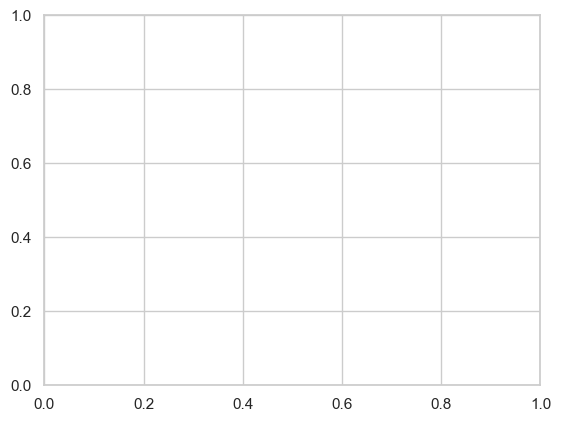

In [23]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

Text(0.5, 1.0, 'Histogram of prediction errors')

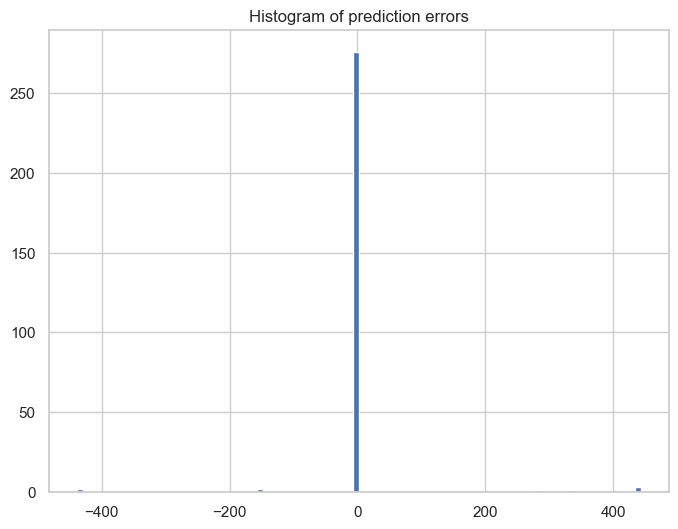

In [24]:
diff = Y_test.to_numpy().ravel() - pred
diff_df = pd.DataFrame(diff)
diff_df.hist(bins = 100, figsize=(8, 6))
plt.title('Histogram of prediction errors')


In [26]:
Y_test


diff
602  2180
703   106
748   759
351   172
310  1199
..    ...
880  1073
892  1497
102  1809
85   2159
694  1783

[285 rows x 1 columns]

In [27]:
Y_test.to_numpy().ravel() > 125

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [28]:
pred

array([2180.0030037 ,  105.99865065,  759.00041077,  171.99923377,
       1199.00026603, 1012.00168811,  980.9999964 ,  736.99958551,
       1716.00068254, 1526.00211307,  917.00217404, 1012.0015531 ,
        759.00013693, 1725.0023695 ,   85.00019499, 1625.99964169,
       1557.00062703,  161.99703692,  824.0007616 , 1549.00729732,
        248.00240378,   69.98151469,  554.99952979,  135.00200418,
       1724.99999342,  981.00118927,  667.01707149, 1526.00242393,
       2180.00259219,  916.99969013,  995.00352666,  236.99954481,
       1073.00595407, 1199.00091632, 1661.99188989,  165.00021011,
       1809.00576793, 1820.9988134 , 1820.99944608,  722.99973869,
       1153.00062174,  758.99705954,  759.00012626, 2158.99565049,
       2179.99900948,  737.00207941,  456.99884434, 1598.9961655 ,
       1820.99998998, 1012.00049043, 1161.90841439,  216.00502627,
        325.99700709,   36.00374958,  190.99879703, 1557.00087252,
       2204.00271747,   84.99968497, 1073.00219524,  999.99931

In [29]:
diff_np = diff_df.to_numpy()

In [30]:
np.sqrt(np.sum((diff_np)**2)/len(diff_df))

65.0632732787687

In [31]:
(np.sqrt(np.sum((diff_np)**2)/len(diff_df)))/(Y_test.to_numpy().ravel().max()-Y_test.to_numpy().ravel().min())

0.030010734907181136

# Ordinal Encoding (Test 1)

In [11]:
test_data = data.copy()
test_data

Morph T Best  N Best M Best Grade  Age     Sex          Cancer Plan CNS  \
0    8140.0      4     2.0     1b    GX   59  FEMALE  No active treatment  Y1   
1    8140.0      4     2.0     1b    GX   59  FEMALE  No active treatment  Y1   
2    8140.0     2a     0.0      0    G3   54    MALE             Curative  Y1   
3    8140.0     2a     0.0      0    G3   54    MALE             Curative  Y1   
4    8140.0     2a     0.0      0    G3   54    MALE             Curative  Y1   
..      ...    ...     ...    ...   ...  ...     ...                  ...  ..   
945  9861.0     1a     0.0      0    GX   75    MALE         Non Curative  99   
946  9861.0     1a     0.0      0    GX   75    MALE         Non Curative  99   
947  9861.0     1a     0.0      0    GX   75    MALE         Non Curative  99   
948  9861.0     1a     0.0      0    GX   75    MALE         Non Curative  99   
949  9861.0     1a     0.0      0    GX   75    MALE         Non Curative  99   

     ACE  ...   Clinical Trial  Chemo Radiation Regimen Time Delay  \
0      0  ...  Not Taking Part               NO                YES   
1      0  ...  Not Taking Part               NO                YES   
2      9  ...  Not Taking Part               NO                 NO   
3      9  ...  Not Taking Part               NO                 NO   
4      9  ...  Not Taking Part               NO                 NO   
..   ...  ...              ...              ...                ...   
945    1  ...  Not Taking Part               NO                 NO   
946    1  ...  Not Taking Part               NO                 NO   
947    1  ...  Not Taking Part               NO                 NO   
948    1  ...  Not Taking Part               NO                 NO   
949    1  ...  Not Taking Part               NO                 NO   

    Regimen Stopped Early Outcome Cycle Dose Administration  \
0                      NO     0.0     1               200.0   
1                      NO     0.0     1                10.0   
2                      NO     0.0     1               130.0   
3                      NO     0.0     1               210.0   
4                      NO     0.0     2                10.0   
..                    ...     ...   ...                 ...   
945                    NO     0.0     4               240.0   
946                    NO     0.0     4                 8.0   
947                    NO     0.0     4               120.0   
948                    NO     0.0     3               950.0   
949                    NO     0.0     3               330.0   

     Administration Route   Drug Group  diff  
0                       1    ETOPOSIDE    70  
1                       2    NOT CHEMO    70  
2                       1    ETOPOSIDE   165  
3                       1    ETOPOSIDE   165  
4                       2    NOT CHEMO   165  
..                    ...          ...   ...  
945                     1      STEROID   191  
946                     1      STEROID   191  
947                     1    DOCETAXEL   191  
948                     1  CARBOPLATIN   191  
949                     1  CARBOPLATIN   191  

[950 rows x 23 columns]

In [12]:
cat_vars

['T Best',
 'N Best',
 'M Best',
 'Grade',
 'Sex',
 'Cancer Plan',
 'CNS',
 'ACE',
 'Regimen',
 'Clinical Trial',
 'Chemo Radiation',
 'Regimen Time Delay',
 'Regimen Stopped Early',
 'Outcome',
 'Administration Route',
 'Drug Group']

In [13]:
for var in cat_vars:
    test_data[var] = test_data[var].astype('category')
    test_data[var] = test_data[var].cat.codes
    test_data[var] = test_data[var].astype("int")
test_data

Morph  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  CNS  ACE  \
0    8140.0       7       2       3      4   59    0            1    3    0   
1    8140.0       7       2       3      4   59    0            1    3    0   
2    8140.0       4       0       0      2   54    1            0    3    4   
3    8140.0       4       0       0      2   54    1            0    3    4   
4    8140.0       4       0       0      2   54    1            0    3    4   
..      ...     ...     ...     ...    ...  ...  ...          ...  ...  ...   
945  9861.0       1       0       0      4   75    1            2    0    1   
946  9861.0       1       0       0      4   75    1            2    0    1   
947  9861.0       1       0       0      4   75    1            2    0    1   
948  9861.0       1       0       0      4   75    1            2    0    1   
949  9861.0       1       0       0      4   75    1            2    0    1   

     ...  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
0    ...               0                0                   1   
1    ...               0                0                   1   
2    ...               0                0                   0   
3    ...               0                0                   0   
4    ...               0                0                   0   
..   ...             ...              ...                 ...   
945  ...               0                0                   0   
946  ...               0                0                   0   
947  ...               0                0                   0   
948  ...               0                0                   0   
949  ...               0                0                   0   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
0                        0        0      1                200.0   
1                        0        0      1                 10.0   
2                        0        0      1                130.0   
3                        0        0      1                210.0   
4                        0        0      2                 10.0   
..                     ...      ...    ...                  ...   
945                      0        0      4                240.0   
946                      0        0      4                  8.0   
947                      0        0      4                120.0   
948                      0        0      3                950.0   
949                      0        0      3                330.0   

     Administration Route  Drug Group  diff  
0                       0          12    70  
1                       1          22    70  
2                       0          12   165  
3                       0          12   165  
4                       1          22   165  
..                    ...         ...   ...  
945                     0          28   191  
946                     0          28   191  
947                     0           9   191  
948                     0           3   191  
949                     0           3   191  

[950 rows x 23 columns]

In [14]:
Ytrain = test_data[["diff"]]
Xtrain = test_data.drop(columns=["diff"])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)


In [14]:
X_train_summary = shap.kmeans(X_scaled_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_scaled_test)

NameError: name 'shap' is not defined

In [34]:
shap.summary_plot(shap_values, X_test)

NameError: name 'X_test' is not defined

In [33]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test)

NameError: name 'X_test' is not defined

# Ordinal Encoding (Test 2)

In [194]:
test_data = data.copy()
test_data

Morph  Behaviour T Best  N Best M Best Grade  Age     Sex  \
0    8140.0  MALIGNANT      4     2.0     1b    GX   59  FEMALE   
1    8140.0  MALIGNANT      4     2.0     1b    GX   59  FEMALE   
2    8140.0  MALIGNANT     2a     0.0      0    G3   54    MALE   
3    8140.0  MALIGNANT     2a     0.0      0    G3   54    MALE   
4    8140.0  MALIGNANT     2a     0.0      0    G3   54    MALE   
..      ...        ...    ...     ...    ...   ...  ...     ...   
945  9861.0  MALIGNANT     1a     0.0      0    GX   75    MALE   
946  9861.0  MALIGNANT     1a     0.0      0    GX   75    MALE   
947  9861.0  MALIGNANT     1a     0.0      0    GX   75    MALE   
948  9861.0  MALIGNANT     1a     0.0      0    GX   75    MALE   
949  9861.0  MALIGNANT     1a     0.0      0    GX   75    MALE   

             Cancer Plan CNS  ...   Clinical Trial  Chemo Radiation  \
0    No active treatment  Y1  ...  Not Taking Part               NO   
1    No active treatment  Y1  ...  Not Taking Part               NO   
2               Curative  Y1  ...  Not Taking Part               NO   
3               Curative  Y1  ...  Not Taking Part               NO   
4               Curative  Y1  ...  Not Taking Part               NO   
..                   ...  ..  ...              ...              ...   
945         Non Curative  99  ...  Not Taking Part               NO   
946         Non Curative  99  ...  Not Taking Part               NO   
947         Non Curative  99  ...  Not Taking Part               NO   
948         Non Curative  99  ...  Not Taking Part               NO   
949         Non Curative  99  ...  Not Taking Part               NO   

     Regimen Time Delay Regimen Stopped Early Outcome Cycle  \
0                   YES                    NO     0.0     1   
1                   YES                    NO     0.0     1   
2                    NO                    NO     0.0     1   
3                    NO                    NO     0.0     1   
4                    NO                    NO     0.0     2   
..                  ...                   ...     ...   ...   
945                  NO                    NO     0.0     4   
946                  NO                    NO     0.0     4   
947                  NO                    NO     0.0     4   
948                  NO                    NO     0.0     3   
949                  NO                    NO     0.0     3   

    Dose Administration Administration Route   Drug Group  diff  
0                 200.0                    1    ETOPOSIDE    70  
1                  10.0                    2    NOT CHEMO    70  
2                 130.0                    1    ETOPOSIDE   165  
3                 210.0                    1    ETOPOSIDE   165  
4                  10.0                    2    NOT CHEMO   165  
..                  ...                  ...          ...   ...  
945               240.0                    1      STEROID   191  
946                 8.0                    1      STEROID   191  
947               120.0                    1    DOCETAXEL   191  
948               950.0                    1  CARBOPLATIN   191  
949               330.0                    1  CARBOPLATIN   191  

[950 rows x 24 columns]

In [195]:
for var in cat_vars:
    test_data[var] = test_data[var].astype('category')
    test_data[var] = test_data[var].cat.codes
    test_data[var] = test_data[var].astype("int")
test_data

Morph  Behaviour  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  \
0    8140.0          0       7       2       3      4   59    0            1   
1    8140.0          0       7       2       3      4   59    0            1   
2    8140.0          0       4       0       0      2   54    1            0   
3    8140.0          0       4       0       0      2   54    1            0   
4    8140.0          0       4       0       0      2   54    1            0   
..      ...        ...     ...     ...     ...    ...  ...  ...          ...   
945  9861.0          0       1       0       0      4   75    1            2   
946  9861.0          0       1       0       0      4   75    1            2   
947  9861.0          0       1       0       0      4   75    1            2   
948  9861.0          0       1       0       0      4   75    1            2   
949  9861.0          0       1       0       0      4   75    1            2   

     CNS  ...  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
0      3  ...               0                0                   1   
1      3  ...               0                0                   1   
2      3  ...               0                0                   0   
3      3  ...               0                0                   0   
4      3  ...               0                0                   0   
..   ...  ...             ...              ...                 ...   
945    0  ...               0                0                   0   
946    0  ...               0                0                   0   
947    0  ...               0                0                   0   
948    0  ...               0                0                   0   
949    0  ...               0                0                   0   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
0                        0        0      1                200.0   
1                        0        0      1                 10.0   
2                        0        0      1                130.0   
3                        0        0      1                210.0   
4                        0        0      2                 10.0   
..                     ...      ...    ...                  ...   
945                      0        0      4                240.0   
946                      0        0      4                  8.0   
947                      0        0      4                120.0   
948                      0        0      3                950.0   
949                      0        0      3                330.0   

     Administration Route  Drug Group  diff  
0                       0          12    70  
1                       1          22    70  
2                       0          12   165  
3                       0          12   165  
4                       1          22   165  
..                    ...         ...   ...  
945                     0          28   191  
946                     0          28   191  
947                     0           9   191  
948                     0           3   191  
949                     0           3   191  

[950 rows x 24 columns]

In [196]:
for index, row in test_data.iterrows():
    for var in cat_vars:
        if test_data[var].nunique() == 1:
            continue
        if test_data.at[index, var] == (test_data[var].nunique()-1):
            test_data.at[index, var] = 0
        else:
            test_data.at[index, var] += 1

test_data
    

Morph  Behaviour  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  \
0    8140.0          0       0       3       0      0   59    1            2   
1    8140.0          0       0       3       0      0   59    1            2   
2    8140.0          0       5       1       1      3   54    0            1   
3    8140.0          0       5       1       1      3   54    0            1   
4    8140.0          0       5       1       1      3   54    0            1   
..      ...        ...     ...     ...     ...    ...  ...  ...          ...   
945  9861.0          0       2       1       1      5   75    0            3   
946  9861.0          0       2       1       1      5   75    0            3   
947  9861.0          0       2       1       1      5   75    0            3   
948  9861.0          0       2       1       1      5   75    0            3   
949  9861.0          0       2       1       1      5   75    0            3   

     CNS  ...  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
0      4  ...               1                1                   0   
1      4  ...               1                1                   0   
2      4  ...               1                1                   1   
3      4  ...               1                1                   1   
4      4  ...               1                1                   1   
..   ...  ...             ...              ...                 ...   
945    1  ...               1                1                   1   
946    1  ...               1                1                   1   
947    1  ...               1                1                   1   
948    1  ...               1                1                   1   
949    1  ...               1                1                   1   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
0                        1        1      1                200.0   
1                        1        1      1                 10.0   
2                        1        1      1                130.0   
3                        1        1      1                210.0   
4                        1        1      2                 10.0   
..                     ...      ...    ...                  ...   
945                      1        1      4                240.0   
946                      1        1      4                  8.0   
947                      1        1      4                120.0   
948                      1        1      3                950.0   
949                      1        1      3                330.0   

     Administration Route  Drug Group  diff  
0                       1          13    70  
1                       2          23    70  
2                       1          13   165  
3                       1          13   165  
4                       2          23   165  
..                    ...         ...   ...  
945                     1          29   191  
946                     1          29   191  
947                     1          10   191  
948                     1           4   191  
949                     1           4   191  

[950 rows x 24 columns]

In [197]:
Ytrain = test_data[["diff"]]
Xtrain = test_data.drop(columns=["diff"])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

In [198]:
X_train_summary = shap.kmeans(X_scaled_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_scaled_test)

  0%|          | 0/285 [00:00<?, ?it/s]

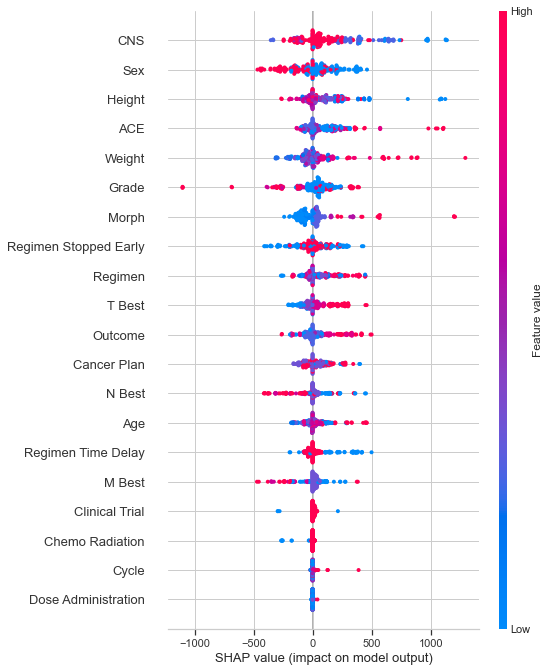

In [199]:
shap.summary_plot(shap_values, X_test)

# Ordinal Encoding (Test 3)

In [166]:
for index, row in test_data.iterrows():
    for var in cat_vars:
        if test_data[var].nunique() == 1:
            continue
        if test_data.at[index, var] == (test_data[var].nunique()-1):
            test_data.at[index, var] = 0
        else:
            test_data.at[index, var] += 1

test_data
    

Morph  Behaviour  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  \
0    8140.0          0       1       0       1      1   59    0            3   
1    8140.0          0       1       0       1      1   59    0            3   
2    8140.0          0       6       2       2      4   54    1            2   
3    8140.0          0       6       2       2      4   54    1            2   
4    8140.0          0       6       2       2      4   54    1            2   
..      ...        ...     ...     ...     ...    ...  ...  ...          ...   
945  9861.0          0       3       2       2      6   75    1            0   
946  9861.0          0       3       2       2      6   75    1            0   
947  9861.0          0       3       2       2      6   75    1            0   
948  9861.0          0       3       2       2      6   75    1            0   
949  9861.0          0       3       2       2      6   75    1            0   

     CNS  ...  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
0      5  ...               2                0                   1   
1      5  ...               2                0                   1   
2      5  ...               2                0                   0   
3      5  ...               2                0                   0   
4      5  ...               2                0                   0   
..   ...  ...             ...              ...                 ...   
945    2  ...               2                0                   0   
946    2  ...               2                0                   0   
947    2  ...               2                0                   0   
948    2  ...               2                0                   0   
949    2  ...               2                0                   0   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
0                        0        2      1                200.0   
1                        0        2      1                 10.0   
2                        0        2      1                130.0   
3                        0        2      1                210.0   
4                        0        2      2                 10.0   
..                     ...      ...    ...                  ...   
945                      0        2      4                240.0   
946                      0        2      4                  8.0   
947                      0        2      4                120.0   
948                      0        2      3                950.0   
949                      0        2      3                330.0   

     Administration Route  Drug Group  diff  
0                       2          14    70  
1                       3          24    70  
2                       2          14   165  
3                       2          14   165  
4                       3          24   165  
..                    ...         ...   ...  
945                     2          30   191  
946                     2          30   191  
947                     2          11   191  
948                     2           5   191  
949                     2           5   191  

[950 rows x 24 columns]

In [167]:
Ytrain = test_data[["diff"]]
Xtrain = test_data.drop(columns=["diff"])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

In [168]:
X_train_summary = shap.kmeans(X_scaled_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_scaled_test)

  0%|          | 0/285 [00:00<?, ?it/s]

In [169]:
shap.summary_plot(shap_values, X_test)

# SHAP (MLPRegressor)

In [25]:
import shap
shap.initjs()

In [26]:
X_train_summary = shap.kmeans(X_scaled_train, 10)
# explain all the predictions in the test set
shap_explainer = shap.KernelExplainer(reg.predict, X_train_summary)

In [27]:
shap_values = shap_explainer.shap_values(X_scaled_test)


  0%|          | 0/285 [00:00<?, ?it/s]

In [28]:
shap_values[0]

array([-183.19630091,  -15.78290032,  621.82542422,  303.95911274,
       -410.58837803,  180.3747409 , -294.06269519,  142.51505798,
          0.        ,  268.256021  , -206.08966004,  -69.56159212,
        135.11796613,   10.74920391,    0.        ,  469.66995314,
       -259.52186765,  308.29768881,    0.        ,    0.        ,
          0.        ,    0.        ])

In [29]:
shap.summary_plot(shap_values, X_scaled_test, Xtrain.columns)

In [30]:
shap.summary_plot(shap_values, X_scaled_test, Xtrain.columns, max_display = 10)

In [26]:
shap.force_plot(shap_explainer.expected_value, shap_values[0], X_scaled_test[0], feature_names = Xtrain.columns)

In [33]:
shap_explainer.expected_value + total_sum[0]

NameError: name 'total_sum' is not defined

In [ ]:
np.mean(reg.predict(X_scaled_test))

In [ ]:
data

# LIME (MLPRegressor)

In [31]:
import lime
import lime.lime_tabular
import dill

In [32]:
num_vars = ["Height","Weight","Morph","Age","Cycle","Dose Administration"]
cat_vars = X_train.columns.tolist()
for var in num_vars:
    cat_vars.remove(var)
cat_vars

['T Best',
 'N Best',
 'M Best',
 'Grade',
 'Sex',
 'Cancer Plan',
 'CNS',
 'ACE',
 'Regimen',
 'Clinical Trial',
 'Chemo Radiation',
 'Regimen Time Delay',
 'Regimen Stopped Early',
 'Outcome',
 'Administration Route',
 'Drug Group']

In [33]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_scaled_train, feature_names=X_train.columns, categorical_features=cat_vars, verbose=True, mode='regression')
i = 0
exp = explainer.explain_instance(X_scaled_test[i], reg.predict, num_features=10)
exp.show_in_notebook(show_table=True)

Intercept 26.087235252341088
Prediction_local [1091.15688933]
Right: 2180.003003697873


In [34]:
exp = explainer.explain_instance(X_scaled_test[i], reg.predict, num_features=10)
exp.show_in_notebook(show_table=True)

Intercept 70.17303768907641
Prediction_local [1019.5788055]
Right: 2180.003003697873


In [146]:
with open('LIMEexplainer', 'wb') as f: dill.dump(explainer,f)

In [147]:
type(exp.as_map()[0][0])

tuple

# DiCE (MLPRegressor)

In [35]:
import dice_ml
from dice_ml.utils import helpers # helper functions

In [36]:
X_scaled_train

array([[0.02203117, 0.85714286, 0.66666667, ..., 0.05333333, 0.        ,
        0.09375   ],
       [0.03761419, 0.57142857, 0.        , ..., 0.05333333, 0.        ,
        0.09375   ],
       [0.03761419, 0.85714286, 0.33333333, ..., 0.03733333, 0.25      ,
        0.6875    ],
       ...,
       [0.07522837, 1.        , 1.        , ..., 0.17333333, 0.        ,
        0.21875   ],
       [0.03761419, 0.85714286, 0.        , ..., 0.03333333, 0.        ,
        0.84375   ],
       [0.02203117, 0.71428571, 0.66666667, ..., 0.01666667, 0.        ,
        0.6875    ]])

In [37]:
Xtrain

Morph  T Best  N Best  M Best  Grade  Age  Sex  Cancer Plan  CNS  ACE  \
0    8140.0       7       2       3      4   59    0            1    3    0   
1    8140.0       7       2       3      4   59    0            1    3    0   
2    8140.0       4       0       0      2   54    1            0    3    4   
3    8140.0       4       0       0      2   54    1            0    3    4   
4    8140.0       4       0       0      2   54    1            0    3    4   
..      ...     ...     ...     ...    ...  ...  ...          ...  ...  ...   
945  9861.0       1       0       0      4   75    1            2    0    1   
946  9861.0       1       0       0      4   75    1            2    0    1   
947  9861.0       1       0       0      4   75    1            2    0    1   
948  9861.0       1       0       0      4   75    1            2    0    1   
949  9861.0       1       0       0      4   75    1            2    0    1   

     ...  Regimen  Clinical Trial  Chemo Radiation  Regimen Time Delay  \
0    ...        0               0                0                   1   
1    ...        0               0                0                   1   
2    ...       10               0                0                   0   
3    ...       10               0                0                   0   
4    ...       10               0                0                   0   
..   ...      ...             ...              ...                 ...   
945  ...       22               0                0                   0   
946  ...       22               0                0                   0   
947  ...       22               0                0                   0   
948  ...       22               0                0                   0   
949  ...       22               0                0                   0   

     Regimen Stopped Early  Outcome  Cycle  Dose Administration  \
0                        0        0      1                200.0   
1                        0        0      1                 10.0   
2                        0        0      1                130.0   
3                        0        0      1                210.0   
4                        0        0      2                 10.0   
..                     ...      ...    ...                  ...   
945                      0        0      4                240.0   
946                      0        0      4                  8.0   
947                      0        0      4                120.0   
948                      0        0      3                950.0   
949                      0        0      3                330.0   

     Administration Route  Drug Group  
0                       0          12  
1                       1          22  
2                       0          12  
3                       0          12  
4                       1          22  
..                    ...         ...  
945                     0          28  
946                     0          28  
947                     0           9  
948                     0           3  
949                     0           3  

[950 rows x 22 columns]

In [38]:
Xtrain_df = pd.DataFrame(Xtrain_scaled, columns = (test_data.drop(columns=["diff"])).columns)
Ytrain_df = pd.DataFrame(Ytrain, columns = ["diff"])
dice_data = pd.concat([Xtrain_df, Ytrain_df], axis =1)

for var in cat_vars:
    dice_data[var] = dice_data[var].astype("category")
    

    
num_vars = ["Height","Weight","Morph","Age","Cycle","Dose Administration"]
d = dice_ml.Data(dataframe=dice_data, continuous_features=num_vars, categorical_features = cat_vars, outcome_name='diff')

In [33]:
d

In [153]:
dice_data.dtypes

Morph                     float64
T Best                   category
N Best                   category
M Best                   category
Grade                    category
Age                       float64
Sex                      category
Cancer Plan              category
CNS                      category
ACE                      category
Height                    float64
Weight                    float64
Regimen                  category
Clinical Trial           category
Chemo Radiation          category
Regimen Time Delay       category
Regimen Stopped Early    category
Outcome                  category
Cycle                     float64
Dose Administration       float64
Administration Route     category
Drug Group               category
diff                        int64
dtype: object

In [39]:
m = dice_ml.Model(model=reg, backend="sklearn",model_type='regressor')

In [40]:
dice_exp = dice_ml.Dice(d, m, method="genetic")

In [41]:

dice_X_test = pd.DataFrame(X_scaled_test, columns = X_test.columns)
dice_X_test

for var in cat_vars:
    dice_X_test[var] = dice_X_test[var].astype("category")


In [42]:
dice_X_test

Morph    T Best    N Best    M Best Grade       Age  Sex Cancer Plan  \
0    0.300913  0.571429  0.000000  0.000000  0.50  0.661017  0.0    0.000000   
1    0.075228  1.000000  1.000000  1.000000  0.50  0.491525  1.0    0.666667   
2    0.037614  0.857143  0.333333  0.000000  1.00  0.627119  1.0    0.000000   
3    0.075228  0.857143  1.000000  0.666667  0.25  0.779661  0.0    0.666667   
4    0.005373  0.142857  0.000000  0.000000  1.00  0.915254  0.0    0.000000   
..        ...       ...       ...       ...   ...       ...  ...         ...   
280  0.132187  1.000000  0.666667  1.000000  0.50  0.644068  0.0    0.666667   
281  0.075228  0.285714  0.000000  0.000000  1.00  0.627119  0.0    0.666667   
282  0.037614  0.571429  0.000000  0.000000  0.50  0.288136  1.0    0.000000   
283  0.075228  0.142857  0.000000  0.000000  0.50  0.508475  0.0    0.000000   
284  0.037614  1.000000  0.666667  0.000000  0.50  0.372881  1.0    1.000000   

     CNS   ACE  ...   Regimen  Clinical Trial Chemo Radiation  \
0    0.6  0.25  ...  0.314286             0.0             0.0   
1    0.6  1.00  ...  0.057143             0.0             0.0   
2    0.6  1.00  ...  0.457143             0.0             0.0   
3    0.6  0.50  ...  0.742857             0.0             0.0   
4    0.6  1.00  ...  0.742857             0.0             0.0   
..   ...   ...  ...       ...             ...             ...   
280  0.6  0.00  ...  0.400000             0.0             0.0   
281  0.6  0.00  ...  0.200000             1.0             0.0   
282  0.0  0.50  ...  0.914286             0.0             0.0   
283  0.0  0.75  ...  0.285714             0.0             0.0   
284  0.0  0.25  ...  0.485714             0.0             0.0   

    Regimen Time Delay Regimen Stopped Early Outcome     Cycle  \
0                  1.0                   1.0     0.6  0.133333   
1                  0.0                   1.0     0.4  0.066667   
2                  0.0                   0.0     0.0  0.200000   
3                  0.0                   1.0     0.4  0.266667   
4                  0.0                   0.0     0.0  0.266667   
..                 ...                   ...     ...       ...   
280                0.0                   0.0     0.0  0.133333   
281                0.0                   1.0     0.4  1.000000   
282                0.0                   1.0     0.4  0.133333   
283                1.0                   0.0     0.0  0.133333   
284                1.0                   0.0     0.0  0.200000   

    Dose Administration  Administration Route  Drug Group  
0              0.001333                  0.25     0.68750  
1              0.026667                  0.25     0.37500  
2              0.013333                  0.00     0.68750  
3              0.085333                  0.25     0.93750  
4              0.000000                  0.25     0.68750  
..                  ...                   ...         ...  
280            0.116667                  0.00     0.84375  
281            0.212800                  0.00     0.53125  
282            0.014667                  0.25     1.00000  
283            0.120000                  0.00     0.84375  
284            0.020000                  0.00     0.81250  

[285 rows x 22 columns]

In [38]:
dice_X_test.dtypes

Morph                     float64
T Best                   category
N Best                   category
M Best                   category
Grade                    category
Age                       float64
Sex                      category
Cancer Plan              category
CNS                      category
ACE                      category
Height                    float64
Weight                    float64
Regimen                  category
Clinical Trial           category
Chemo Radiation          category
Regimen Time Delay       category
Regimen Stopped Early    category
Outcome                  category
Cycle                     float64
Dose Administration       float64
Administration Route     category
Drug Group               category
dtype: object

In [43]:
e1 = dice_exp.generate_counterfactuals(dice_X_test[0:1], total_CFs=20, desired_range=[700, 8000])
e1.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.36s/it]

Query instance (original outcome : 2180)


Morph              T Best N Best M Best Grade       Age  Sex  \
0  0.300913  0.5714285714285714    0.0    0.0   0.5  0.661017  0.0   

  Cancer Plan                 CNS   ACE  ...  Clinical Trial  Chemo Radiation  \
0         0.0  0.6000000000000001  0.25  ...             0.0              0.0   

  Regimen Time Delay Regimen Stopped Early             Outcome     Cycle  \
0                1.0                   1.0  0.6000000000000001  0.133333   

  Dose Administration Administration Route  Drug Group         diff  
0            0.001333                 0.25      0.6875  2180.002986  

[1 rows x 23 columns]


Diverse Counterfactual set (new outcome: [700, 8000])


Morph               T Best              N Best M Best Grade  \
0  0.30091348                    -                   -      -     -   
0  0.30091348                    -                   -      -     -   
0  0.30091348                    -                   -      -     -   
0  0.30091348                    -                   -      -     -   
0  0.30091348                    -                   -      -     -   
0  0.30091348                    -                   -      -     -   
0  0.03761419  0.14285714285714285                   -      -     -   
0  0.07522837  0.14285714285714285                   -      -   1.0   
0  0.02203117                    -                   -      -   1.0   
0  0.07522837  0.14285714285714285                   -      -   1.0   
0  0.03761419   0.8571428571428571                   -      -   1.0   
0  0.03761419                    -  0.3333333333333333      -   1.0   
0  0.03761419  0.14285714285714285                   -      -     -   
0  0.03761419                    -                   -      -  0.25   
0  0.02203117                    -                   -      -   1.0   
0  0.02203117                    -                   -      -   1.0   
0  0.02203117                    -                   -      -   1.0   
0  0.07522837  0.14285714285714285                   -      -   1.0   
0  0.07522837  0.14285714285714285                   -      -   1.0   
0  0.02203117                    -                   -      -   1.0   

          Age  Sex         Cancer Plan  CNS  ACE  ... Clinical Trial  \
0  0.66101694    -                   -    -    -  ...              -   
0  0.66101694    -                   -    -    -  ...              -   
0  0.66101694    -                   -    -    -  ...              -   
0  0.66101694    -                   -    -    -  ...              -   
0  0.66101694    -                   -    -    -  ...              -   
0  0.66101694    -                   -    -    -  ...              -   
0  0.64406782    -                   -    -  0.0  ...              -   
0  0.55932206    -                   -  1.0    -  ...              -   
0  0.66101694    -                   -    -  0.0  ...              -   
0  0.55932206    -                   -  1.0    -  ...              -   
0  0.66101694  1.0                   -    -  0.0  ...              -   
0  0.47457626  1.0                   -    -  1.0  ...              -   
0  0.64406782    -                   -    -  0.0  ...              -   
0  0.42372882  1.0  0.6666666666666666    -  1.0  ...              -   
0  0.66101694    -  0.6666666666666666    -  1.0  ...              -   
0  0.81355929    -                   -  1.0  1.0  ...              -   
0  0.81355929    -                   -  1.0  1.0  ...              -   
0  0.55932206    -                   -  1.0    -  ...              -   
0  0.55932206    -                   -  1.0    -  ...              -   
0  0.66101694    -  0.6666666666666666    -  1.0  ...              -   

  Chemo Radiation Regimen Time Delay Regimen Stopped Early Outcome  \
0               -                  -                     -       -   
0               -                  -                     -       -   
0               -                  -                     -       -   
0               -                  -                     -       -   
0               -                  -                     -       -   
0               -                  -                     -       -   
0               -                  -                     -     0.0   
0               -                  -                     -     0.0   
0               -                  -                     -     0.4   
0               -                  -                     -     0.0   
0               -                0.0                     -     0.4   
0               -                  -                     -     0.0   
0               -                  -                     -     0.0   
0               -      

In [44]:
imp = dice_exp.local_feature_importance(dice_X_test[0:1], cf_examples_list=e1.cf_examples_list, desired_range=[1000, 12500])
print(imp.local_importance)

[{'Outcome': 0.7, 'Height': 0.7, 'Weight': 0.7, 'Morph': 0.7, 'Dose Administration': 0.65, 'Grade': 0.6, 'Regimen': 0.6, 'ACE': 0.5, 'Age': 0.5, 'T Best': 0.35, 'Drug Group': 0.35, 'CNS': 0.3, 'Cycle': 0.3, 'Sex': 0.15, 'Cancer Plan': 0.15, 'Regimen Time Delay': 0.15, 'Regimen Stopped Early': 0.15, 'Administration Route': 0.15, 'N Best': 0.05, 'M Best': 0.0, 'Clinical Trial': 0.0, 'Chemo Radiation': 0.0}]


In [45]:
import matplotlib.pyplot as plt

sorted_dict = dict(sorted(imp.local_importance[0].items(), key=lambda x: x[1]))

plt.barh(range(len(sorted_dict)), list(sorted_dict.values()), tick_label=list(sorted_dict.keys()))
plt.show()

In [81]:
type(imp.local_importance[0])

dict

# Comparison Metrics


In [39]:
import pickle
import dill
import lime
import lime.lime_tabular
import dice_ml
from dice_ml.utils import helpers # helper functions
import shap

## Shap Values

In [40]:
shap_values[0]

array([-180.67298943,  -34.04599505,  627.77445449,  311.17335302,
       -430.04554469,  169.97806094, -290.97704393,  157.25741655,
          0.        ,  283.09018957, -190.840719  ,  -84.64882702,
        134.15279455,    0.        ,    0.        ,  475.67794953,
       -248.70161844,  302.79029348,    0.        ,    0.        ,
          0.        ,    0.        ])

In [60]:
type(shap_values[0].tolist())

list

In [46]:
shap_dict = {}
for j in range(len(shap_values)):
    tmp_lst = []
    lst = shap_values[j].tolist()
    for i in range(len(lst)):
        tmp_lst.append([i,lst[i]])
    tmp_lst.sort(key = lambda l:abs(l[1]), reverse = True)
    shap_dict.update({j:tmp_lst})

print(shap_dict[0])


[[2, 621.8254242209439], [15, 469.669953137055], [4, -410.5883780290471], [17, 308.297688812768], [3, 303.9591127431628], [6, -294.06269518917327], [9, 268.2560210006403], [16, -259.5218676476912], [10, -206.08966004415282], [0, -183.1963009111145], [5, 180.37474090058774], [7, 142.5150579824417], [12, 135.1179661271566], [11, -69.56159211788216], [1, -15.78290032230592], [13, 10.749203906465368], [8, 0.0], [14, 0.0], [18, 0.0], [19, 0.0], [20, 0.0], [21, 0.0]]


In [132]:
with open('shap_dict.pkl', 'wb') as fp:
    pickle.dump(shap_dict, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [47]:
cat_list = X_train.columns.to_list()
cat_dict = {}

for i in range(len(cat_list)):
    cat_dict.update({i:cat_list[i]})
print(cat_dict)

{0: 'Morph', 1: 'T Best', 2: 'N Best', 3: 'M Best', 4: 'Grade', 5: 'Age', 6: 'Sex', 7: 'Cancer Plan', 8: 'CNS', 9: 'ACE', 10: 'Height', 11: 'Weight', 12: 'Regimen', 13: 'Clinical Trial', 14: 'Chemo Radiation', 15: 'Regimen Time Delay', 16: 'Regimen Stopped Early', 17: 'Outcome', 18: 'Cycle', 19: 'Dose Administration', 20: 'Administration Route', 21: 'Drug Group'}


In [134]:
with open('cat_list.pkl', 'wb') as fp:
    pickle.dump(cat_list, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


## LIME Values

In [48]:
lime_dict = exp.as_map()

In [49]:
print(lime_dict)

{0: [(2, -774.2584482470362), (3, -662.4148797969135), (13, -484.9502925935458), (4, 480.53318363682564), (8, 310.50735132312883), (7, 289.19639531461456), (14, -260.66647778503545), (17, -235.4250855080972), (1, 218.77355322728042), (6, 169.29893261540693)], 1: [(2, 774.2584482470362), (3, 662.4148797969135), (13, 484.9502925935458), (4, -480.53318363682564), (8, -310.50735132312883), (7, -289.19639531461456), (14, 260.66647778503545), (17, 235.4250855080972), (1, -218.77355322728042), (6, -169.29893261540693)]}


In [137]:
with open('lime_dict.pkl', 'wb') as fp:
    pickle.dump(lime_dict, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


## DiCE


In [49]:
import dill
import pickle
with open('DICEexplainer', 'wb') as f: dill.dump(dice_exp,f)

#dice_x_test
with open('dice_X_test.pkl', 'wb') as fp:
    pickle.dump(dice_X_test, fp)
    print('saved successfully to file')

saved successfully to file


# Sum of 5 instances of Shap


In [50]:
shap_dict

{0: [[2, 621.8254242209439],
  [15, 469.669953137055],
  [4, -410.5883780290471],
  [17, 308.297688812768],
  [3, 303.9591127431628],
  [6, -294.06269518917327],
  [9, 268.2560210006403],
  [16, -259.5218676476912],
  [10, -206.08966004415282],
  [0, -183.1963009111145],
  [5, 180.37474090058774],
  [7, 142.5150579824417],
  [12, 135.1179661271566],
  [11, -69.56159211788216],
  [1, -15.78290032230592],
  [13, 10.749203906465368],
  [8, 0.0],
  [14, 0.0],
  [18, 0.0],
  [19, 0.0],
  [20, 0.0],
  [21, 0.0]],
 1: [[3, -859.588303644848],
  [2, -531.2934566672094],
  [4, -341.041428138103],
  [1, 339.1117361646798],
  [7, 265.0017659794515],
  [8, -263.023110824735],
  [17, 250.3241943791636],
  [9, 91.86591782522854],
  [5, -59.780678646393426],
  [15, 55.63989894770816],
  [16, 55.539032202346334],
  [10, -40.85532096344144],
  [13, 38.93028443488561],
  [11, -35.206140812238004],
  [6, -29.734698283677858],
  [12, -7.932270426633465],
  [0, 0.0],
  [14, 0.0],
  [18, 0.0],
  [19, 0.0],


In [51]:
lst = shap_dict.get(0)
total = 0

for i in range(len(lst)):
    total += lst[i][1]
    
print(total)

1001.9617745698546


In [52]:
sum_list = []
for i in range(5):
    sum_list.append(shap_dict.get(i))
sum_list

[[[2, 621.8254242209439],
  [15, 469.669953137055],
  [4, -410.5883780290471],
  [17, 308.297688812768],
  [3, 303.9591127431628],
  [6, -294.06269518917327],
  [9, 268.2560210006403],
  [16, -259.5218676476912],
  [10, -206.08966004415282],
  [0, -183.1963009111145],
  [5, 180.37474090058774],
  [7, 142.5150579824417],
  [12, 135.1179661271566],
  [11, -69.56159211788216],
  [1, -15.78290032230592],
  [13, 10.749203906465368],
  [8, 0.0],
  [14, 0.0],
  [18, 0.0],
  [19, 0.0],
  [20, 0.0],
  [21, 0.0]],
 [[3, -859.588303644848],
  [2, -531.2934566672094],
  [4, -341.041428138103],
  [1, 339.1117361646798],
  [7, 265.0017659794515],
  [8, -263.023110824735],
  [17, 250.3241943791636],
  [9, 91.86591782522854],
  [5, -59.780678646393426],
  [15, 55.63989894770816],
  [16, 55.539032202346334],
  [10, -40.85532096344144],
  [13, 38.93028443488561],
  [11, -35.206140812238004],
  [6, -29.734698283677858],
  [12, -7.932270426633465],
  [0, 0.0],
  [14, 0.0],
  [18, 0.0],
  [19, 0.0],
  [20,

In [53]:
total_sum = []
for i in range(len(sum_list)):
    tmp = sum_list[i].copy()
    total = 0
    for j in range(len(tmp)):
        total += tmp[j][1]
    total_sum.append(total)
total_sum
print(sum(total_sum))

-1474.2045807158077


In [71]:
#shap.force_plot(explainer.expected_value, shap_values[0], X_scaled_test[0], feature_names = Xtrain.columns)
for i in range(5):
    shap.force_plot(shap_explainer.expected_value, shap_values[i], X_scaled_test[i], feature_names = Xtrain.columns)
    print("Sum of Shap + Expected Value: ", shap_explainer.expected_value + total_sum[i] )


Sum of Shap + Expected Value:  2180.0030036978724
Sum of Shap + Expected Value:  105.99865065420136
Sum of Shap + Expected Value:  759.0004107689788
Sum of Shap + Expected Value:  171.99923376978973
Sum of Shap + Expected Value:  1199.0002660334394


In [72]:
shap.force_plot(shap_explainer.expected_value, shap_values[0], X_scaled_test[0], feature_names = Xtrain.columns)


In [73]:
print("Sum of Shap + Expected Value: ", shap_explainer.expected_value + total_sum[0] )

Sum of Shap + Expected Value:  2180.0030036978724


In [74]:
shap.force_plot(shap_explainer.expected_value, shap_values[1], X_scaled_test[1], feature_names = Xtrain.columns)


In [75]:
print("Sum of Shap + Expected Value: ", shap_explainer.expected_value + total_sum[1] )

Sum of Shap + Expected Value:  105.99865065420136


In [76]:
shap.force_plot(shap_explainer.expected_value, shap_values[2], X_scaled_test[2], feature_names = Xtrain.columns)


In [77]:
print("Sum of Shap + Expected Value: ", shap_explainer.expected_value + total_sum[2] )

Sum of Shap + Expected Value:  759.0004107689788


In [78]:
shap.force_plot(shap_explainer.expected_value, shap_values[3], X_scaled_test[3], feature_names = Xtrain.columns)


In [79]:
print("Sum of Shap + Expected Value: ", shap_explainer.expected_value + total_sum[3] )

Sum of Shap + Expected Value:  171.99923376978973


In [80]:
shap.force_plot(shap_explainer.expected_value, shap_values[4], X_scaled_test[4], feature_names = Xtrain.columns)


In [81]:
print("Sum of Shap + Expected Value: ", shap_explainer.expected_value + total_sum[4] )

Sum of Shap + Expected Value:  1199.0002660334394


In [38]:
all_list = []
totalSum = 0
for i in range(len(shap_dict)):
    tmp = shap_dict.get(i).copy()
    for j in range(len(tmp)):
        totalSum += tmp[j][1]
        #print(tmp[j][1])
        
mean = totalSum/len(shap_dict)
print(mean)
print(len(shap_dict))

NameError: name 'shap_dict' is not defined

# 5 Instances of Lime

# Compare Shap and Lime

In [83]:
#SHAP
with open('shap_dict.pkl', 'rb') as fp:
    shap_dict = pickle.load(fp)
    print('Shap dictionary')

#LIME
with open('LIMEexplainer', 'rb') as f: explainer = dill.load(f)
    
#DICE

with open('DICEexplainer','rb') as f: dice_exp = dill.load(f)
    
with open('dice_X_test.pkl', 'rb') as fp:
    dice_X_test = pickle.load(fp)
    print('dice_X_test file')

with open('cat_list.pkl', 'rb') as fp:
    cat_dict = pickle.load(fp)
    print('cat_dict dictionary')


#MLPRegressor

with open('MLPRegressor', 'rb') as f: reg = dill.load(f)

Shap dictionary
dice_X_test file
cat_dict dictionary


In [54]:
e1 = dice_exp.generate_counterfactuals(dice_X_test[0:1], total_CFs=10, desired_range=[500, 1000])
imp = dice_exp.local_feature_importance(dice_X_test[0:1], cf_examples_list=e1.cf_examples_list, desired_range=[500, 1000])
print(imp.local_importance)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.39it/s]

[{'Grade': 1.0, 'Outcome': 1.0, 'Height': 1.0, 'Weight': 1.0, 'Morph': 1.0, 'Age': 1.0, 'Dose Administration': 0.9, 'ACE': 0.8, 'Regimen Time Delay': 0.6, 'Regimen Stopped Early': 0.6, 'CNS': 0.5, 'N Best': 0.3, 'Sex': 0.3, 'Regimen': 0.3, 'T Best': 0.2, 'Drug Group': 0.2, 'Cycle': 0.2, 'M Best': 0.1, 'Chemo Radiation': 0.1, 'Administration Route': 0.1, 'Cancer Plan': 0.0, 'Clinical Trial': 0.0}]


In [85]:
type(imp.local_importance)


list

In [86]:
dice_X_test[k-1:k]

NameError: name 'k' is not defined

In [55]:
k = 0
print("Shap Top 15")
print("------------------")
lst = shap_dict.get(k)
for i in range(15):
    print(f"{cat_dict[lst[i][0]] : <25}{' - ' : ^5}{ lst[i][1] : >20}")
    
print("------------------")  
print("LIME Top 15")
print("------------------")
exp = explainer.explain_instance(X_scaled_test[k], reg.predict, num_features=24)
print("------------------")
#print(exp.as_map())
for i in range(15):
    #print(f"{cat_dict[(exp.as_map().get(0))[i][0]] : <25}{ ' - ' : ^5 }{( float(exp.as_map().get(0))[i][1]) : >20}")
    print(f"{cat_dict[(exp.as_map().get(0))[i][0]] : <25}{' - ' : ^5}{ (exp.as_map().get(0))[i][1] : >20}")
    
print("------------------")  
print("DiCE Top 15")
print("------------------")


e1 = dice_exp.generate_counterfactuals(dice_X_test[k:k+1], total_CFs=10, desired_range=[500, 1000])
imp = dice_exp.local_feature_importance(dice_X_test[k:k+1], cf_examples_list=e1.cf_examples_list, desired_range=[500, 1000])
dice_dict = imp.local_importance[0]
for key in sorted(dice_dict, key=dice_dict.get, reverse=True)[:15]:
    print(f"{key : <25}{' - ' : ^5}{ dice_dict[key] : >20}")

Shap Top 15
------------------
N Best                     -     621.8254242209439
Regimen Time Delay         -      469.669953137055
Grade                      -    -410.5883780290471
Outcome                    -      308.297688812768
M Best                     -     303.9591127431628
Sex                        -   -294.06269518917327
ACE                        -     268.2560210006403
Regimen Stopped Early      -    -259.5218676476912
Height                     -   -206.08966004415282
Morph                      -    -183.1963009111145
Age                        -    180.37474090058774
Cancer Plan                -     142.5150579824417
Regimen                    -     135.1179661271566
Weight                     -    -69.56159211788216
T Best                     -    -15.78290032230592
------------------
LIME Top 15
------------------
Intercept 138.89864744638498
Prediction_local [1032.96443835]
Right: 2180.003003697873
------------------
N Best                     -    -780.65814434291

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.39it/s]

Outcome                    -                   1.0
Height                     -                   1.0
Weight                     -                   1.0
Morph                      -                   1.0
Age                        -                   1.0
Grade                      -                   0.9
ACE                        -                   0.9
Dose Administration        -                   0.9
Regimen Time Delay         -                   0.7
Regimen Stopped Early      -                   0.7
CNS                        -                   0.4
N Best                     -                   0.3
Sex                        -                   0.3
Regimen                    -                   0.3
Drug Group                 -                   0.2


In [170]:
print((exp.as_map().get(0))[0][0])

2


In [54]:
print(cat_dict)

{0: 'Morph', 1: 'T Best', 2: 'N Best', 3: 'M Best', 4: 'Grade', 5: 'Age', 6: 'Sex', 7: 'Cancer Plan', 8: 'CNS', 9: 'ACE', 10: 'Height', 11: 'Weight', 12: 'Regimen', 13: 'Clinical Trial', 14: 'Chemo Radiation', 15: 'Regimen Time Delay', 16: 'Regimen Stopped Early', 17: 'Outcome', 18: 'Cycle', 19: 'Dose Administration', 20: 'Administration Route', 21: 'Drug Group'}


# Spearman Correlation

In [55]:
import scipy.stats
import numpy as np

In [56]:
shap_list = []
lime_list = []
dice_list = []


# SHAP
shap_list = lst.copy()
shap_list.sort(key = lambda l:l[0])
new_shap_list = []
for i in range(len(shap_list)):
    new_shap_list.append(abs(shap_list[i][1]))

shap_array = np.array(new_shap_list)

# LIME

lime_list = exp.as_map().get(0).copy()
lime_list.sort(key = lambda l:l[0])

new_lime_list = []
for i in range(len(shap_list)):
    new_lime_list.append(abs(lime_list[i][1]))
    
lime_array = np.array(new_lime_list)

# DICE

for i in range(len(cat_dict)):
    dice_list.append(dice_dict.get(cat_dict[i]))
    
dice_array = np.array(dice_list)

shap_rank = scipy.stats.rankdata(shap_array)
lime_rank = scipy.stats.rankdata(lime_array)
dice_rank = scipy.stats.rankdata(dice_array)

In [174]:
shap_lime_corr = scipy.stats.spearmanr(shap_rank, lime_rank)
shap_lime_corr

SpearmanrResult(correlation=0.3992214787700049, pvalue=0.06567985440520938)

In [175]:
shap_dice_corr = scipy.stats.spearmanr(shap_rank, dice_rank)
shap_dice_corr

SpearmanrResult(correlation=0.31378372872273036, pvalue=0.15500346401253703)

In [176]:
lime_dice_corr = scipy.stats.spearmanr(lime_rank, dice_rank)
lime_dice_corr

SpearmanrResult(correlation=-0.21512159765641145, pvalue=0.3363348682490809)

In [177]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [178]:
shap_lime_dice_list = []
for i in range(len(new_lime_list)):
    shap_lime_dice_list.append((new_shap_list[i],new_lime_list[i], dice_list[i]))
shap_lime_dice_pd = pd.DataFrame(shap_lime_dice_list, columns = ["SHAP","LIME", "DICE"])

In [179]:
shap_lime_dice_pd.corr(method="spearman")

SHAP      LIME      DICE
SHAP  1.000000  0.399221  0.313784
LIME  0.399221  1.000000 -0.215122
DICE  0.313784 -0.215122  1.000000

In [180]:
display_correlation(shap_lime_dice_pd)

SHAP      LIME      DICE
SHAP  1.000000  0.399221  0.313784
LIME  0.399221  1.000000 -0.215122
DICE  0.313784 -0.215122  1.000000

# Pearson Correlation

In [181]:
def display_pearson_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(method="pearson"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Pearson Correlation")
    return(r)

SHAP      LIME      DICE
SHAP  1.000000  0.467739  0.258548
LIME  0.467739  1.000000 -0.313382
DICE  0.258548 -0.313382  1.000000

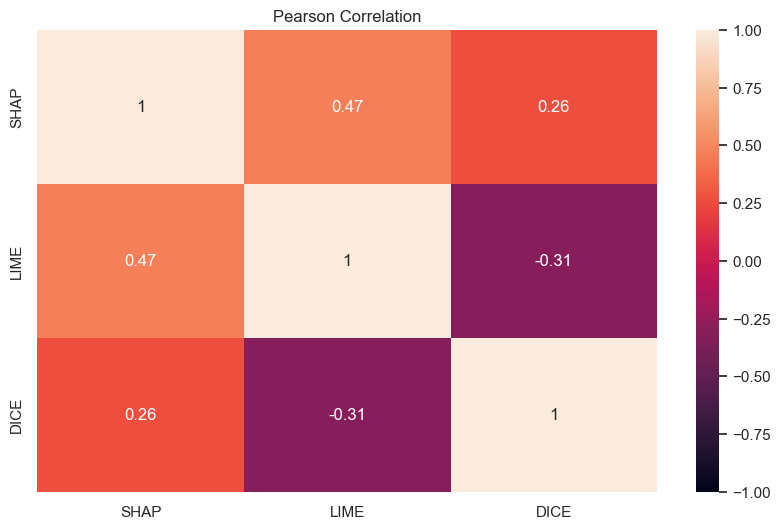

In [182]:
display_pearson_correlation(shap_lime_dice_pd)

# Global Comparison


## Shap

In [56]:
global_shap_dict = {}
tmp = []
for i in range(len(shap_dict.get(0))):
    global_shap_dict[i] = 0
    tmp.append(0)
print(global_shap_dict)

for i in range(len(shap_dict)):
        lst = shap_dict.get(i)
        for j in range(len(lst)):
            global_shap_dict[lst[j][0]] += abs(lst[j][1])
            tmp[lst[j][0]] += abs(lst[j][1])
            #print(lst[j][0])
        
print(tmp)
myInt = len(shap_dict)
print(global_shap_dict)
#global_shap_lst[:] = [ (x/myInt) for x in global_shap_lst]




global_shap_lst = []
#for i in range(len(global_shapLst))
for i in range(len(global_shap_dict)):
    global_shap_lst.append([i,global_shap_dict[i]/myInt])

    
global_shap_lst.sort(key = lambda l:abs(l[1]), reverse = True)
print(global_shap_lst)



{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0}
[10290.799570288555, 55736.39975706935, 98740.18111124166, 77473.39467347314, 54201.36770440362, 30563.2087135912, 55506.80397856599, 60534.61673619639, 49263.84844897851, 51510.35746408166, 29054.05300105556, 22795.431085465985, 16044.385717463358, 10791.294141730004, 3322.5164860133227, 34819.20396428313, 39807.66479938736, 50247.61765068664, 871.7227663110472, 922.862479288724, 198.51702554310427, 899.7032974155928]
{0: 10290.799570288555, 1: 55736.39975706935, 2: 98740.18111124166, 3: 77473.39467347314, 4: 54201.36770440362, 5: 30563.2087135912, 6: 55506.80397856599, 7: 60534.61673619639, 8: 49263.84844897851, 9: 51510.35746408166, 10: 29054.05300105556, 11: 22795.431085465985, 12: 16044.385717463358, 13: 10791.294141730004, 14: 3322.5164860133227, 15: 34819.20396428313, 16: 39807.66479938736, 17: 50247.61765068664, 18: 871.7227663110472, 

In [184]:
print(len(shap_dict))

285


In [185]:
shap_dict.get(i)[0][0]

3

## Lime

In [57]:
exp = explainer.explain_instance(X_scaled_test[0], reg.predict, num_features=24)

Intercept 148.754921950582
Prediction_local [992.44565208]
Right: 2180.003003697873


In [58]:
exp.as_map()

{0: [(2, -804.6797249037171),
  (3, -628.8414712343134),
  (13, -447.9910462115303),
  (4, 440.9376974703736),
  (8, 330.9416904623794),
  (17, -287.6098508768058),
  (7, 249.485231965716),
  (14, -230.0509262310961),
  (1, 153.95052813485253),
  (6, 142.61902842516622),
  (10, 122.64399745540447),
  (15, 118.63496528317926),
  (16, 92.70109213375544),
  (0, -61.45896932740114),
  (20, -32.14244878392625),
  (11, 29.173288401823196),
  (21, -28.83532795802655),
  (9, -23.826836584720755),
  (18, 19.26075486224064),
  (5, -17.64413889343489),
  (19, 13.527026469007037),
  (12, 5.514709809108226)],
 1: [(2, 804.6797249037171),
  (3, 628.8414712343134),
  (13, 447.9910462115303),
  (4, -440.9376974703736),
  (8, -330.9416904623794),
  (17, 287.6098508768058),
  (7, -249.485231965716),
  (14, 230.0509262310961),
  (1, -153.95052813485253),
  (6, -142.61902842516622),
  (10, -122.64399745540447),
  (15, -118.63496528317926),
  (16, -92.70109213375544),
  (0, 61.45896932740114),
  (20, 32.14

In [59]:
global_lime_dict = {}

for i in range(len(shap_dict.get(0))):
    global_lime_dict[i] = 0



for i in range(len(shap_dict)):
    exp = explainer.explain_instance(X_scaled_test[i], reg.predict, num_features=24)
    lst = exp.as_map().get(0)
    #print(lst[0][0])
    for j in range(len(lst)):
        global_lime_dict[lst[j][0]] += abs(lst[j][1])

print(global_lime_dict)

Intercept 57.285276465639754
Prediction_local [1058.23456239]
Right: 2180.003003697873
Intercept 548.7865517068996
Prediction_local [254.38131121]
Right: 105.99865065420073
Intercept 286.058248283641
Prediction_local [832.86281091]
Right: 759.0004107689786
Intercept 675.7700125294477
Prediction_local [126.7204636]
Right: 171.99923376978947
Intercept -206.8301878873374
Prediction_local [1312.02249537]
Right: 1199.0002660334387
Intercept 221.06789160050562
Prediction_local [1027.21962454]
Right: 1012.0016881124521
Intercept -314.5922054767361
Prediction_local [1361.76729416]
Right: 980.9999964030212
Intercept -191.95839651534038
Prediction_local [1505.59573494]
Right: 736.9995855110782
Intercept -704.8125758383344
Prediction_local [1863.7197438]
Right: 1716.0006825439646
Intercept -400.0101549104447
Prediction_local [1411.68321349]
Right: 1526.0021130732523
Intercept 538.1039675903722
Prediction_local [357.21721317]
Right: 917.0021740396426
Intercept 339.1065113626503
Prediction_local [1

Intercept 100.09128788531484
Prediction_local [877.31212561]
Right: 2179.9916360331017
Intercept 723.4631627742931
Prediction_local [126.01071462]
Right: 47.99833700039509
Intercept -87.89443894795863
Prediction_local [1122.95904814]
Right: 816.0015349705703
Intercept 597.9058701636618
Prediction_local [376.94845047]
Right: 105.99996628835038
Intercept -758.1760939808721
Prediction_local [2122.88706255]
Right: 1415.9993750480423
Intercept -520.2267145532019
Prediction_local [1741.95259224]
Right: 1715.9997854858086
Intercept 200.10740387990234
Prediction_local [849.98902044]
Right: 238.00076086152154
Intercept 491.38911980436785
Prediction_local [349.84529451]
Right: 495.9907672435656
Intercept 307.38558756029477
Prediction_local [827.22063112]
Right: 1878.997367693435
Intercept 440.47536963533526
Prediction_local [686.95148342]
Right: 135.00050692059517
Intercept -346.4039272868183
Prediction_local [1403.05180668]
Right: 2119.0019792596563
Intercept 238.00963998129487
Prediction_local

Intercept 306.83861602921536
Prediction_local [474.18950412]
Right: 916.9998016567796
Intercept -140.23418972776335
Prediction_local [1270.17221302]
Right: 1556.9948938944517
Intercept 345.3105981380086
Prediction_local [803.1068671]
Right: 135.0006970275208
Intercept 286.1300418074071
Prediction_local [788.20940093]
Right: 789.9970423887952
Intercept -592.3364518773428
Prediction_local [1633.96135383]
Right: 1863.9996208874884
Intercept -664.9090127641057
Prediction_local [1831.01792542]
Right: 1549.0052846677006
Intercept 409.7493143216976
Prediction_local [396.08892381]
Right: 495.99030941390885
Intercept -174.3110763507991
Prediction_local [698.324851]
Right: 1673.9964705058026
Intercept 195.14816565398678
Prediction_local [826.68305574]
Right: 286.00123017899426
Intercept -309.6122823556889
Prediction_local [1364.99633376]
Right: 587.9981819425881
Intercept -831.0181917357097
Prediction_local [2154.1769257]
Right: 456.9988139964723
Intercept -264.18545390631425
Prediction_local [1

In [60]:
global_lime_lst = []

for i in range(len(global_lime_dict)):
    global_lime_lst.append([i,global_lime_dict[i]/myInt])

print(global_lime_lst)

[[0, 25.907472843780273], [1, 181.6807822552198], [2, 660.7443889663316], [3, 610.1155750746345], [4, 483.8954727522981], [5, 216.7352156124696], [6, 132.2539185541445], [7, 230.46420238723522], [8, 330.1604869900461], [9, 43.95430545785388], [10, 108.3384185774304], [11, 33.08061174198162], [12, 34.338184447725624], [13, 517.4843721085479], [14, 192.20167114458562], [15, 140.8524226945283], [16, 32.91832150873634], [17, 252.11206759687246], [18, 28.718711884979058], [19, 25.78928084397026], [20, 26.271000250243056], [21, 26.967118135513143]]


In [61]:
unsorted_global_lime_lst = global_lime_lst.copy()

In [62]:
print(unsorted_global_lime_lst)

[[0, 25.907472843780273], [1, 181.6807822552198], [2, 660.7443889663316], [3, 610.1155750746345], [4, 483.8954727522981], [5, 216.7352156124696], [6, 132.2539185541445], [7, 230.46420238723522], [8, 330.1604869900461], [9, 43.95430545785388], [10, 108.3384185774304], [11, 33.08061174198162], [12, 34.338184447725624], [13, 517.4843721085479], [14, 192.20167114458562], [15, 140.8524226945283], [16, 32.91832150873634], [17, 252.11206759687246], [18, 28.718711884979058], [19, 25.78928084397026], [20, 26.271000250243056], [21, 26.967118135513143]]


In [49]:
global_lime_lst.sort(key = lambda l:abs(l[1]), reverse = True)
print(global_lime_lst)

[[2, 659.7179702301198], [3, 608.5045544653703], [13, 518.5657082179195], [4, 476.3563541779156], [8, 333.0360237008242], [17, 251.0084905991612], [7, 230.34187778947862], [5, 215.2867447356673], [14, 194.54183784912408], [1, 179.5613492547629], [15, 145.09375399790454], [6, 131.2171147230784], [10, 109.4700813319579], [9, 42.627620667612234], [11, 34.160416206333764], [12, 32.5394332721081], [16, 32.508723066540185], [0, 29.905746292811415], [21, 28.174670890394484], [19, 28.170688115871815], [18, 27.97364995700948], [20, 25.624662441729587]]


## DiCE

In [62]:
global_dice_dict = {}
for i in range(len(shap_dict.get(0))):
    global_dice_dict[i] = 0


for i in range(len(shap_dict)):
    e1 = dice_exp.generate_counterfactuals(dice_X_test[k:k+1], total_CFs=20, desired_range=[700, 8000])
    imp = dice_exp.local_feature_importance(dice_X_test[k:k+1], cf_examples_list=e1.cf_examples_list, desired_range=[700, 8000])
    dice_dict = imp.local_importance[0]
    for j in cat_list:
        global_dice_dict[cat_list.index(j)] += dice_dict.get(j)
print(global_dice_dict)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [63]:
global_dice_dict = {}
for i in range(len(shap_dict.get(0))):
    global_dice_dict[i] = 0


cobj = dice_exp.global_feature_importance(dice_X_test, total_CFs=20, desired_range=[700, 8000]) #New Method

  8%|██████▌                                                                          | 23/285 [00:31<06:14,  1.43s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 16%|█████████████▎                                                                   | 47/285 [01:03<05:15,  1.33s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 25%|████████████████████▏                                                            | 71/285 [01:36<04:53,  1.37s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 33%|███████████████████████████                                                      | 95/285 [02:08<04:09,  1.32s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 42%|█████████████████████████████████▍                                              | 119/285 [02:40<03:51,  1.39s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 50%|████████████████████████████████████████▏                                       | 143/285 [03:12<03:07,  1.32s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 59%|██████████████████████████████████████████████▉                                 | 167/285 [03:44<02:36,  1.33s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 67%|█████████████████████████████████████████████████████▌                          | 191/285 [04:16<02:04,  1.32s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 75%|████████████████████████████████████████████████████████████▎                   | 215/285 [04:48<01:35,  1.36s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 84%|███████████████████████████████████████████████████████████████████             | 239/285 [05:21<01:01,  1.34s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


 92%|█████████████████████████████████████████████████████████████████████████▊      | 263/285 [05:53<00:30,  1.36s/it]Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


100%|████████████████████████████████████████████████████████████████████████████████| 285/285 [06:23<00:00,  1.34s/it]


In [64]:
global_dice_dict = {}
for i in range(len(cat_dict)):
    global_dice_dict[i] = 0


In [65]:
print(type(cobj.summary_importance))

<class 'dict'>


In [66]:
dice_dict = cobj.summary_importance.copy()


In [67]:
for j in cat_list:
        global_dice_dict[cat_list.index(j)] += dice_dict.get(j)

In [68]:
global_dice_dict

{0: 0.34543859649122804,
 1: 0.26719298245614037,
 2: 0.23228070175438598,
 3: 0.1492982456140351,
 4: 0.17280701754385966,
 5: 0.5591228070175439,
 6: 0.22894736842105262,
 7: 0.2326315789473684,
 8: 0.20912280701754385,
 9: 0.3794736842105263,
 10: 0.5994736842105263,
 11: 0.6073684210526316,
 12: 0.5591228070175439,
 13: 0.02631578947368421,
 14: 0.041578947368421056,
 15: 0.12736842105263158,
 16: 0.1907017543859649,
 17: 0.2887719298245614,
 18: 0.508421052631579,
 19: 0.8864912280701754,
 20: 0.2928070175438596,
 21: 0.6729824561403509}

In [116]:
#for i in range(len(global_dice_dict)):
    #global_dice_dict[i] = global_dice_dict[i]/myInt
#print(global_dice_dict)

{0: 0.0014749153585718684, 1: 0.00165466297322253, 2: 0.0009959987688519544, 3: 0.000721452754693752, 4: 0.0010317020621729764, 5: 0.0028180978762696214, 6: 0.0009270544783010156, 7: 0.0010550938750384733, 8: 0.0012311480455524776, 9: 0.0017457679285934134, 10: 0.0028587257617728535, 11: 0.002922745460141582, 12: 0.0026198830409356728, 13: 8.125577100646353e-05, 14: 0.00019452139119729148, 15: 0.0007288396429670667, 16: 0.0007854724530624807, 17: 0.0014367497691597415, 18: 0.0016017236072637735, 19: 0.0030581717451523545, 20: 0.0007436134195136965, 21: 0.0022308402585410896}


In [69]:


print("(Absolute)")
print("------------------")
print("Global Shap Top 15")
print("------------------")
lst = global_shap_lst
for i in range(15):
    print(f"{cat_dict[lst[i][0]] : <25}{' - ' : ^5}{ lst[i][1] : >20}")
    
print("------------------")  
print("Global LIME Top 15")
print("------------------")

for i in range(15):
    print(f"{cat_dict[global_lime_lst[i][0]] : <25}{' - ' : ^5}{ global_lime_lst[i][1] : >20}")

    
print("------------------")  
print("Global DiCE Top 15")
print("------------------")

for key in sorted(global_dice_dict, key=global_dice_dict.get, reverse=True)[:15]: #old method
    print(f"{cat_dict[key] : <25}{' - ' : ^5}{ global_dice_dict[key] : >20}")
    
#for key in sorted(dice_dict, key=dice_dict.get, reverse=True)[:15]:
    #print(f"{key : <25}{' - ' : ^5}{ dice_dict[key] : >20}")

(Absolute)
------------------
Global Shap Top 15
------------------
N Best                     -     346.4567758289181
M Best                     -     271.8364725385023
Cancer Plan                -      212.402163986654
T Best                     -    195.56631493708542
Sex                        -    194.76071571426664
Grade                      -    190.18023755931097
ACE                        -     180.7380963651988
Outcome                    -    176.30743035328646
CNS                        -    172.85560859290706
Regimen Stopped Early      -    139.67601683995565
Regimen Time Delay         -    122.17264548871273
Age                        -    107.23932881961825
Height                     -    101.94404561773881
Weight                     -     79.98396872093328
Regimen                    -     56.29609023671354
------------------
Global LIME Top 15
------------------
Morph                      -    25.907472843780273
T Best                     -     181.6807822552198
N Best  

In [82]:
def display_bar_graph(df, title, num):
    plt.figure(figsize=(10,10))
    ax = sns.barplot(data=df,orient='h')
    plt.title("Top " + str(num) + " " + title)
    
    
    
    for i in ax.containers:
        ax.bar_label(i,)


In [74]:

font = {'size'   : 12}
plt.rc('font', **font)

iteritems is deprecated and will be removed in a future version. Use .items instead.


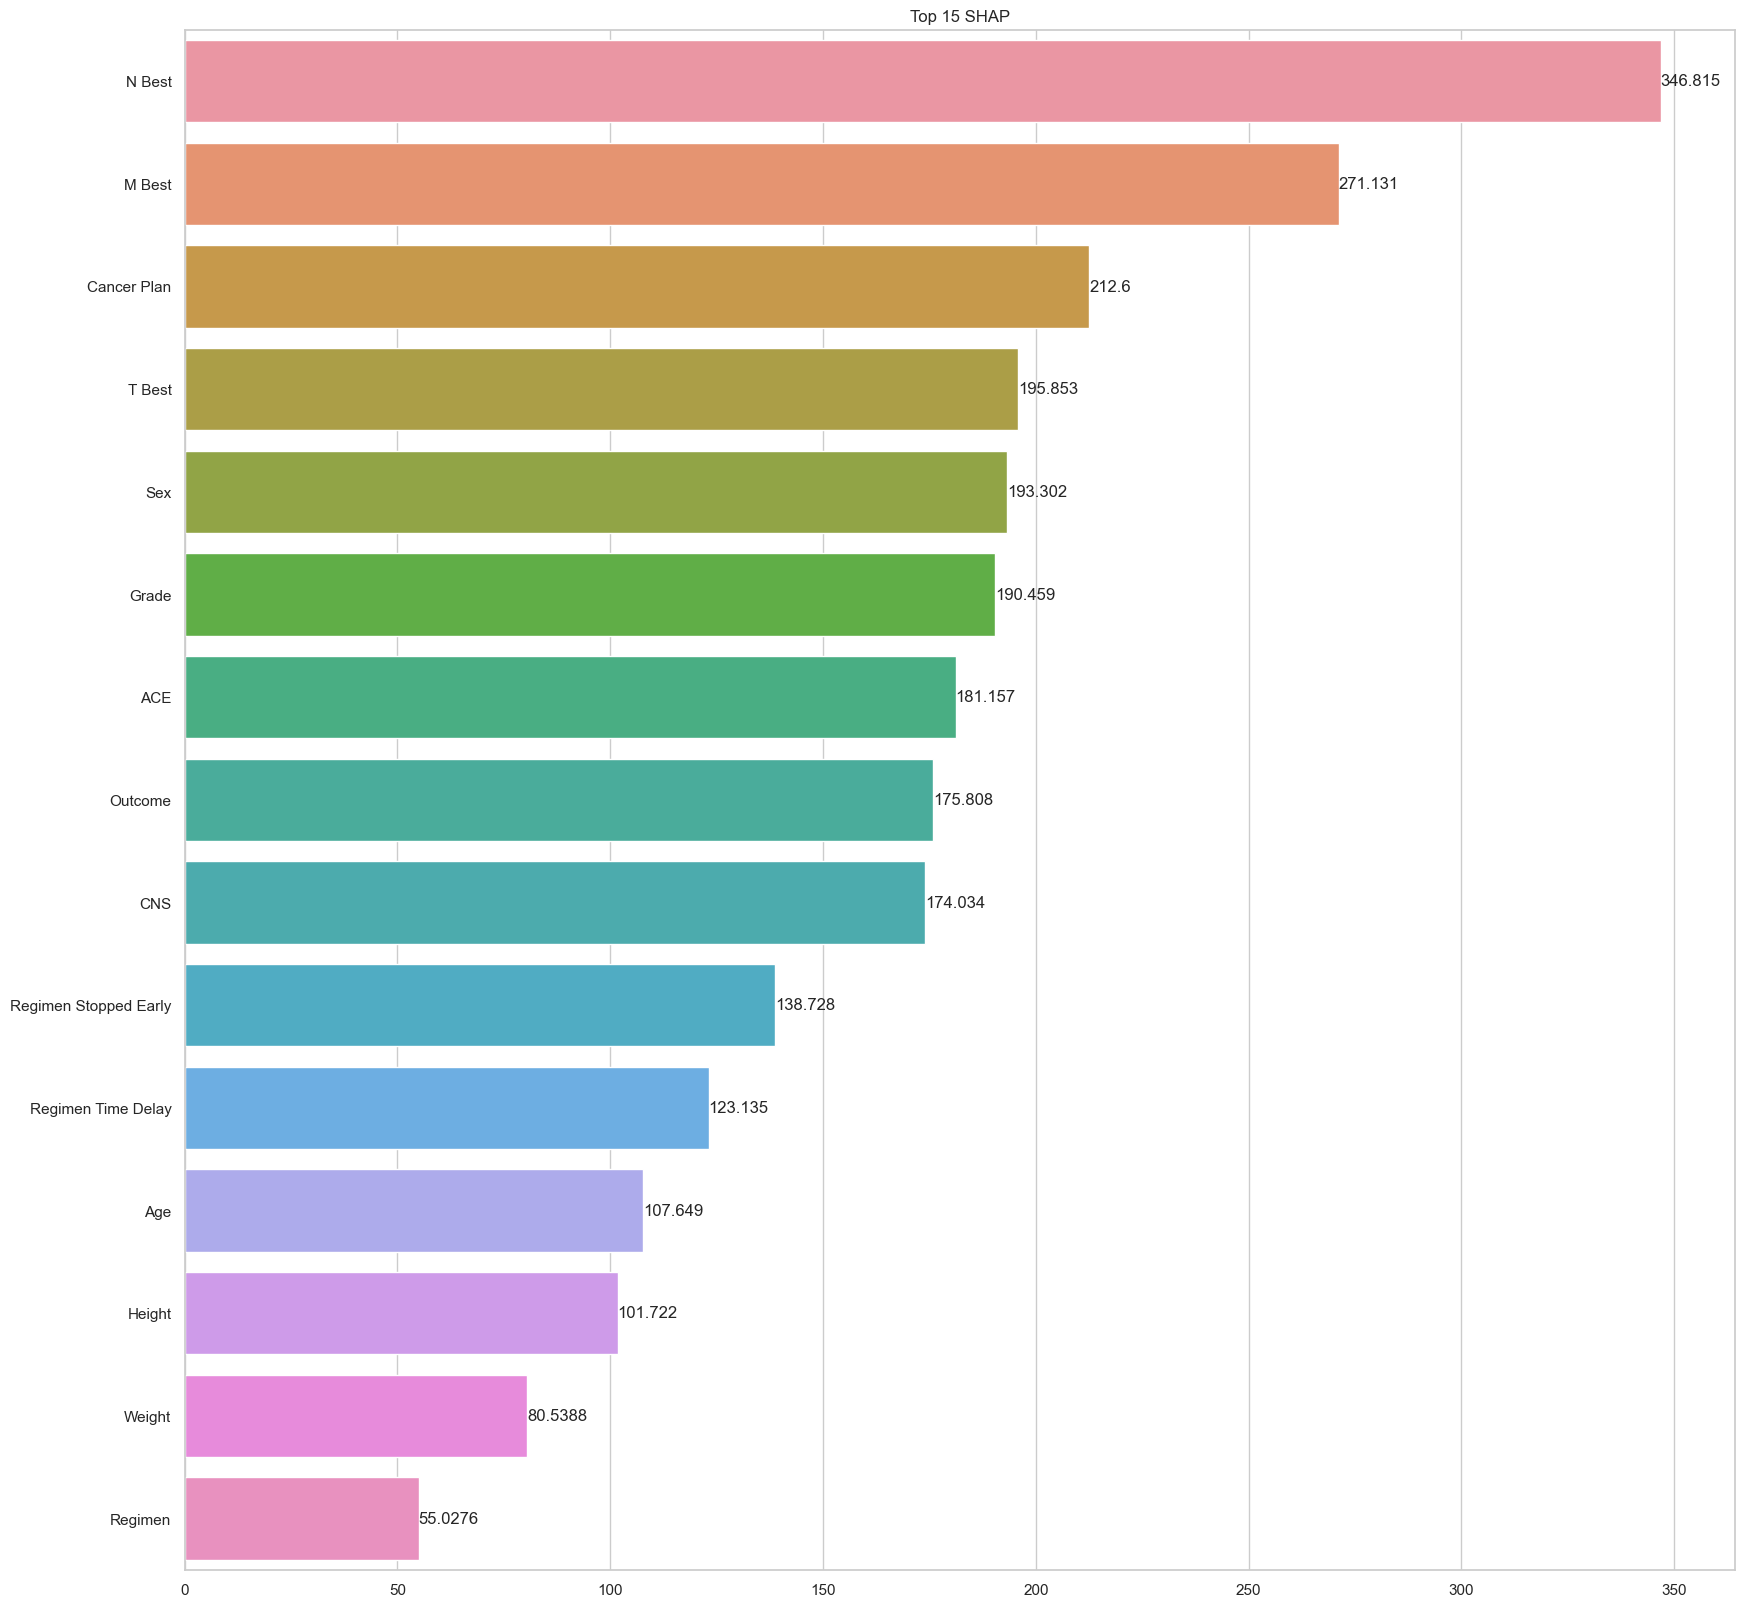

In [59]:
shap_dict = {}
for i in range(15):
    shap_dict[cat_dict[global_shap_lst[i][0]]] = [global_shap_lst[i][1]]

shap_pd = pd.DataFrame.from_dict(shap_dict)
display_bar_graph(shap_pd, "SHAP", 15)

iteritems is deprecated and will be removed in a future version. Use .items instead.


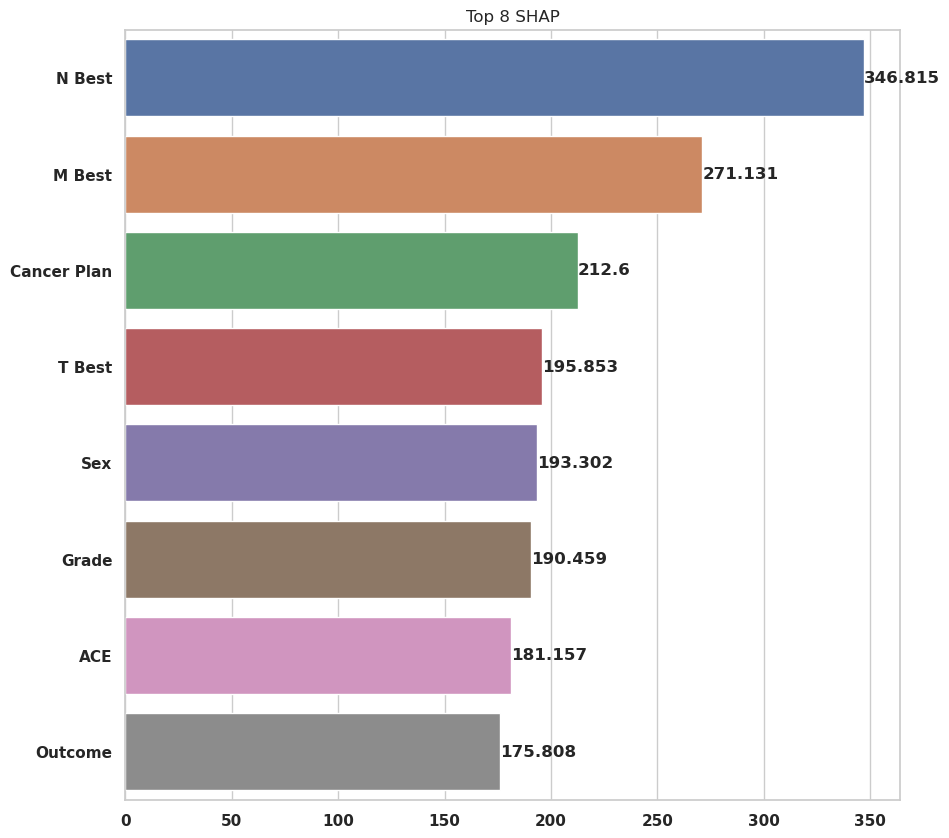

In [83]:
shap_dict = {}
for i in range(8):
    shap_dict[cat_dict[global_shap_lst[i][0]]] = [global_shap_lst[i][1]]

shap_pd = pd.DataFrame.from_dict(shap_dict)
display_bar_graph(shap_pd, "SHAP", 8)

In [ ]:
shap_dict

In [73]:
lime_dict = {}
for i in range(15):
    lime_dict[cat_dict[global_lime_lst[i][0]]] = [global_lime_lst[i][1]]

lime_pd = pd.DataFrame.from_dict(lime_dict)
display_bar_graph(lime_pd, "LIME", 15)

iteritems is deprecated and will be removed in a future version. Use .items instead.


iteritems is deprecated and will be removed in a future version. Use .items instead.


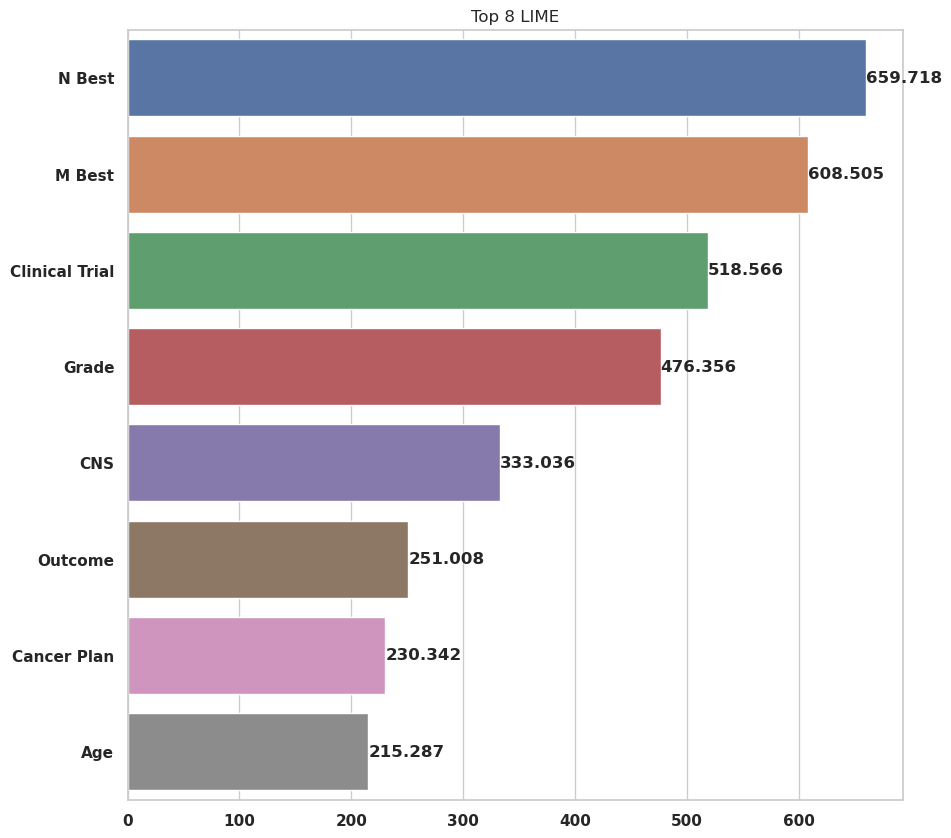

In [76]:
lime_dict = {}
for i in range(8):
    lime_dict[cat_dict[global_lime_lst[i][0]]] = [global_lime_lst[i][1]]

lime_pd = pd.DataFrame.from_dict(lime_dict)
display_bar_graph(lime_pd, "LIME",8)

In [ ]:
dice_dict

In [101]:
global_dice_dict
temp_dice_dict = {}
for key in sorted(global_dice_dict, key=global_dice_dict.get, reverse=True)[:15]:
    temp_dice_dict[cat_dict[key]] = [global_dice_dict.get(key)]
    

dice_pd = pd.DataFrame.from_dict(temp_dice_dict)
display_bar_graph(dice_pd, "DICE")

iteritems is deprecated and will be removed in a future version. Use .items instead.


iteritems is deprecated and will be removed in a future version. Use .items instead.


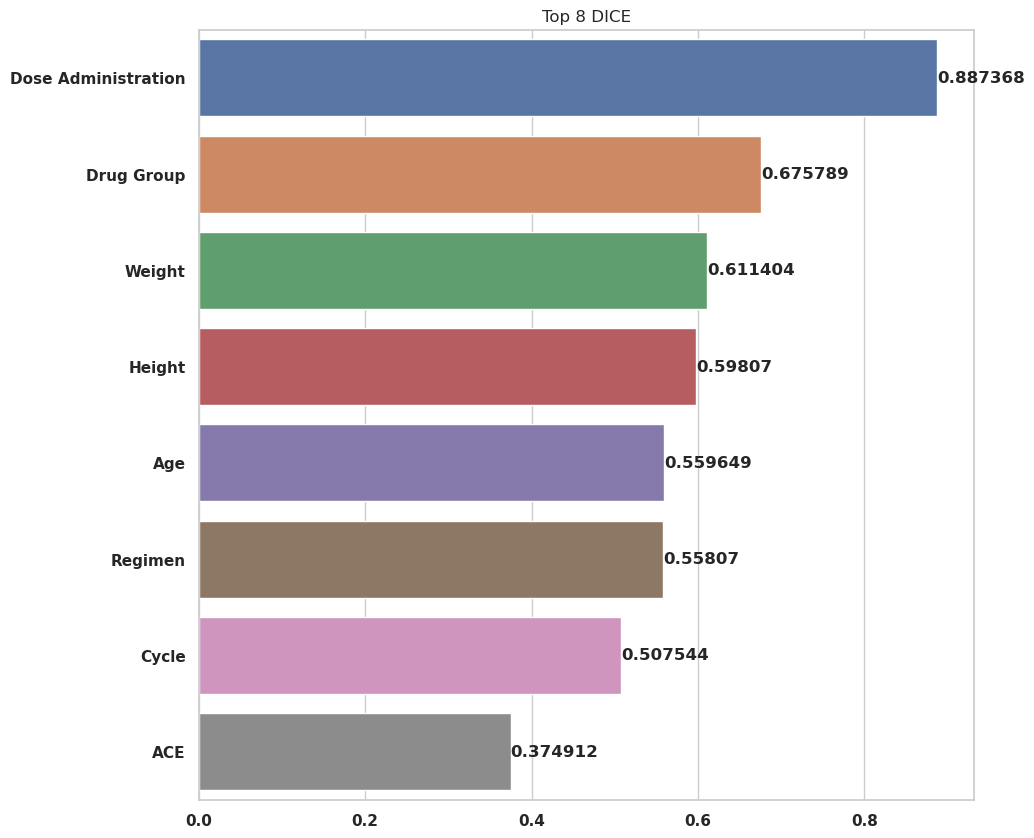

In [77]:
global_dice_dict
temp_dice_dict = {}
for key in sorted(global_dice_dict, key=global_dice_dict.get, reverse=True)[:8]:
    temp_dice_dict[cat_dict[key]] = [global_dice_dict.get(key)]
    

dice_pd = pd.DataFrame.from_dict(temp_dice_dict)
display_bar_graph(dice_pd, "DICE", 8)

In [70]:
global_dice_dict

{0: 0.34543859649122804,
 1: 0.26719298245614037,
 2: 0.23228070175438598,
 3: 0.1492982456140351,
 4: 0.17280701754385966,
 5: 0.5591228070175439,
 6: 0.22894736842105262,
 7: 0.2326315789473684,
 8: 0.20912280701754385,
 9: 0.3794736842105263,
 10: 0.5994736842105263,
 11: 0.6073684210526316,
 12: 0.5591228070175439,
 13: 0.02631578947368421,
 14: 0.041578947368421056,
 15: 0.12736842105263158,
 16: 0.1907017543859649,
 17: 0.2887719298245614,
 18: 0.508421052631579,
 19: 0.8864912280701754,
 20: 0.2928070175438596,
 21: 0.6729824561403509}

# Global Spearman Correlation

In [71]:
import scipy.stats
import numpy as np

In [72]:
shap_list = []
lime_list = []
dice_list = []


# SHAP
shap_list = global_shap_lst.copy()
shap_list.sort(key = lambda l:l[0])
new_shap_list = []
for i in range(len(shap_list)):
    new_shap_list.append(abs(shap_list[i][1]))

shap_array = np.array(new_shap_list)

# LIME

lime_list = global_lime_lst.copy()
lime_list.sort(key = lambda l:l[0])

new_lime_list = []
for i in range(len(shap_list)):
    new_lime_list.append(abs(lime_list[i][1]))
    
lime_array = np.array(new_lime_list)

# DICE

for i in range(len(cat_dict)):
    dice_list.append(global_dice_dict.get(i))
    
dice_array = np.array(dice_list)

shap_rank = scipy.stats.rankdata(shap_array)
lime_rank = scipy.stats.rankdata(lime_array)
dice_rank = scipy.stats.rankdata(dice_array)

In [82]:
lime_list

[[0, 25.907472843780273],
 [1, 181.6807822552198],
 [2, 660.7443889663316],
 [3, 610.1155750746345],
 [4, 483.8954727522981],
 [5, 216.7352156124696],
 [6, 132.2539185541445],
 [7, 230.46420238723522],
 [8, 330.1604869900461],
 [9, 43.95430545785388],
 [10, 108.3384185774304],
 [11, 33.08061174198162],
 [12, 34.338184447725624],
 [13, 517.4843721085479],
 [14, 192.20167114458562],
 [15, 140.8524226945283],
 [16, 32.91832150873634],
 [17, 252.11206759687246],
 [18, 28.718711884979058],
 [19, 25.78928084397026],
 [20, 26.271000250243056],
 [21, 26.967118135513143]]

In [81]:
global_dice_dict

{0: 0.3482456140350877,
 1: 0.2673684210526316,
 2: 0.23333333333333334,
 3: 0.14684210526315788,
 4: 0.17526315789473684,
 5: 0.5531578947368421,
 6: 0.23087719298245615,
 7: 0.2294736842105263,
 8: 0.2080701754385965,
 9: 0.37140350877192985,
 10: 0.5996491228070175,
 11: 0.6075438596491228,
 12: 0.5549122807017544,
 13: 0.02894736842105263,
 14: 0.0412280701754386,
 15: 0.13017543859649122,
 16: 0.18473684210526317,
 17: 0.2845614035087719,
 18: 0.507719298245614,
 19: 0.8928070175438596,
 20: 0.2928070175438596,
 21: 0.6866666666666666}

In [82]:
dice_array

array([0.34824561, 0.26736842, 0.23333333, 0.14684211, 0.17526316,
       0.55315789, 0.23087719, 0.22947368, 0.20807018, 0.37140351,
       0.59964912, 0.60754386, 0.55491228, 0.02894737, 0.04122807,
       0.13017544, 0.18473684, 0.2845614 , 0.5077193 , 0.89280702,
       0.29280702, 0.68666667])

In [78]:
shap_lime_corr = scipy.stats.spearmanr(shap_rank, lime_rank)
shap_dice_corr = scipy.stats.spearmanr(shap_rank, dice_rank)
lime_dice_corr = scipy.stats.spearmanr(lime_rank, dice_rank)


In [79]:

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [80]:
shap_lime_dice_list = []
for i in range(len(new_lime_list)):
    shap_lime_dice_list.append((new_shap_list[i],new_lime_list[i], dice_list[i]))
shap_lime_dice_pd = pd.DataFrame(shap_lime_dice_list, columns = ["SHAP","LIME", "DICE"])

In [81]:
display_correlation(shap_lime_dice_pd)

SHAP      LIME      DICE
SHAP  1.000000  0.699605 -0.404406
LIME  0.699605  1.000000 -0.645016
DICE -0.404406 -0.645016  1.000000

# Global Pearson Correlation

In [83]:
def display_pearson_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(method="pearson"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Pearson Correlation")
    return(r)

In [84]:
display_pearson_correlation(shap_lime_dice_pd)

SHAP      LIME      DICE
SHAP  1.000000  0.656759 -0.419643
LIME  0.656759  1.000000 -0.557634
DICE -0.419643 -0.557634  1.000000

# Jaccard Similarity Index (Top 5)

In [85]:
cat_list

['Morph',
 'T Best',
 'N Best',
 'M Best',
 'Grade',
 'Age',
 'Sex',
 'Cancer Plan',
 'CNS',
 'ACE',
 'Height',
 'Weight',
 'Regimen',
 'Clinical Trial',
 'Chemo Radiation',
 'Regimen Time Delay',
 'Regimen Stopped Early',
 'Outcome',
 'Cycle',
 'Dose Administration',
 'Administration Route',
 'Drug Group']

In [86]:
dice_dict.get("M Best")

0.1492982456140351

In [87]:
dice_dict

{'Dose Administration': 0.8864912280701754,
 'Drug Group': 0.6729824561403509,
 'Weight': 0.6073684210526316,
 'Height': 0.5994736842105263,
 'Regimen': 0.5591228070175439,
 'Age': 0.5591228070175439,
 'Cycle': 0.508421052631579,
 'ACE': 0.3794736842105263,
 'Morph': 0.34543859649122804,
 'Administration Route': 0.2928070175438596,
 'Outcome': 0.2887719298245614,
 'T Best': 0.26719298245614037,
 'Cancer Plan': 0.2326315789473684,
 'N Best': 0.23228070175438598,
 'Sex': 0.22894736842105262,
 'CNS': 0.20912280701754385,
 'Regimen Stopped Early': 0.1907017543859649,
 'Grade': 0.17280701754385966,
 'M Best': 0.1492982456140351,
 'Regimen Time Delay': 0.12736842105263158,
 'Chemo Radiation': 0.041578947368421056,
 'Clinical Trial': 0.02631578947368421}

In [105]:
global_dice_dict = temp_dice_dict

In [101]:

rows, cols = (2, len(cat_dict))
dice_lst = [[0 for i in range(rows)] for j in range(cols)]
#print(dice_lst)

for j in cat_list:
    dice_lst[cat_list.index(j)][0] = cat_list.index(j)
    print(dice_lst[cat_list.index(j)][0])
    dice_lst[cat_list.index(j)][1] = dice_dict.get(j)
dice_lst.sort(key = lambda l:abs(l[1]), reverse = True)

lime_lst = global_lime_lst.copy()
lime_lst.sort(key = lambda l:abs(l[1]), reverse = True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [102]:
dice_lst

[[19, 0.8864912280701754],
 [21, 0.6729824561403509],
 [11, 0.6073684210526316],
 [10, 0.5994736842105263],
 [5, 0.5591228070175439],
 [12, 0.5591228070175439],
 [18, 0.508421052631579],
 [9, 0.3794736842105263],
 [0, 0.34543859649122804],
 [20, 0.2928070175438596],
 [17, 0.2887719298245614],
 [1, 0.26719298245614037],
 [7, 0.2326315789473684],
 [2, 0.23228070175438598],
 [6, 0.22894736842105262],
 [8, 0.20912280701754385],
 [16, 0.1907017543859649],
 [4, 0.17280701754385966],
 [3, 0.1492982456140351],
 [15, 0.12736842105263158],
 [14, 0.041578947368421056],
 [13, 0.02631578947368421]]

In [127]:
dice_lst = [[0 for i in range(rows)] for j in range(cols)]
# Fan request

for j in cat_list:
    dice_lst[cat_list.index(j)][0] = cat_list.index(j)
    print(dice_lst[cat_list.index(j)][0])
    dice_lst[cat_list.index(j)][1] = dice_dict.get(j)
dice_lst.sort(key = lambda l:abs(l[1]), reverse = False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [128]:
dice_lst

[[13, 0.02631578947368421],
 [14, 0.041578947368421056],
 [15, 0.12736842105263158],
 [3, 0.1492982456140351],
 [4, 0.17280701754385966],
 [16, 0.1907017543859649],
 [8, 0.20912280701754385],
 [6, 0.22894736842105262],
 [2, 0.23228070175438598],
 [7, 0.2326315789473684],
 [1, 0.26719298245614037],
 [17, 0.2887719298245614],
 [20, 0.2928070175438596],
 [0, 0.34543859649122804],
 [9, 0.3794736842105263],
 [18, 0.508421052631579],
 [5, 0.5591228070175439],
 [12, 0.5591228070175439],
 [10, 0.5994736842105263],
 [11, 0.6073684210526316],
 [21, 0.6729824561403509],
 [19, 0.8864912280701754]]

In [103]:
lime_lst

[[2, 660.7443889663316],
 [3, 610.1155750746345],
 [13, 517.4843721085479],
 [4, 483.8954727522981],
 [8, 330.1604869900461],
 [17, 252.11206759687246],
 [7, 230.46420238723522],
 [5, 216.7352156124696],
 [14, 192.20167114458562],
 [1, 181.6807822552198],
 [15, 140.8524226945283],
 [6, 132.2539185541445],
 [10, 108.3384185774304],
 [9, 43.95430545785388],
 [12, 34.338184447725624],
 [11, 33.08061174198162],
 [16, 32.91832150873634],
 [18, 28.718711884979058],
 [21, 26.967118135513143],
 [20, 26.271000250243056],
 [0, 25.907472843780273],
 [19, 25.78928084397026]]

In [109]:
dice_lst

[[19, 0.8864912280701754],
 [21, 0.6729824561403509],
 [11, 0.6073684210526316],
 [10, 0.5994736842105263],
 [5, 0.5591228070175439],
 [12, 0.5591228070175439],
 [18, 0.508421052631579],
 [9, 0.3794736842105263],
 [0, 0.34543859649122804],
 [20, 0.2928070175438596],
 [17, 0.2887719298245614],
 [1, 0.26719298245614037],
 [7, 0.2326315789473684],
 [2, 0.23228070175438598],
 [6, 0.22894736842105262],
 [8, 0.20912280701754385],
 [16, 0.1907017543859649],
 [4, 0.17280701754385966],
 [3, 0.1492982456140351],
 [15, 0.12736842105263158],
 [14, 0.041578947368421056],
 [13, 0.02631578947368421]]

In [105]:
shap_lst = global_shap_lst
shap_lst

[[2, 346.4567758289181],
 [3, 271.8364725385023],
 [7, 212.402163986654],
 [1, 195.56631493708542],
 [6, 194.76071571426664],
 [4, 190.18023755931097],
 [9, 180.7380963651988],
 [17, 176.30743035328646],
 [8, 172.85560859290706],
 [16, 139.67601683995565],
 [15, 122.17264548871273],
 [5, 107.23932881961825],
 [10, 101.94404561773881],
 [11, 79.98396872093328],
 [12, 56.29609023671354],
 [13, 37.86418997098247],
 [0, 36.10806866767914],
 [14, 11.657952582502887],
 [19, 3.2381139624165756],
 [21, 3.1568536751424308],
 [18, 3.058676373021218],
 [20, 0.6965509668179097]]

In [106]:
count = 0
top = 5
# shap & lime
for i in range(top):
    if shap_lst[i][0] == lime_lst[i][0]:
        count += 1
    
print("Jaccard Index (Shap & Lime): " , (count/top))

count = 0
# shap & DiCE
for i in range(top):
    if shap_lst[i][0] == dice_lst[i][0]:
        count += 1
    
print("Jaccard Index (Shap & DiCE): " , (count/top))

count = 0
# lime & DiCE
for i in range(top):
    if lime_lst[i][0] == dice_lst[i][0]:
        count += 1
    
print("Jaccard Index (Lime & DiCE): " , (count/top))

Jaccard Index (Shap & Lime):  0.4
Jaccard Index (Shap & DiCE):  0.0
Jaccard Index (Lime & DiCE):  0.0


In [129]:
top = 5

lst1 = []
lst2 = []
lst3 = []
for i in range(top):
    lst1.append(shap_lst[i][0])
    lst2.append(lime_lst[i][0])
    lst3.append(dice_lst[i][0])
    
    
set1 = set(lst1)
set2 = set(lst2)
set3 = set(lst3)


intersection12 = set1.intersection(set2)
union12 = set1.union(set2)
shap_lime = len(intersection12) / len(union12)

intersection13 = set1.intersection(set3)
union13 = set1.union(set3)
shap_dice = len(intersection13) / len(union13)

intersection23 = set2.intersection(set3)
union23 = set2.union(set3)
lime_dice = len(intersection23) / len(union23)

print("Jaccard Index (SHAP & LIME): " , format(shap_lime, ".2f"))
print("Jaccard Index (SHAP & DiCE): " , format(shap_dice, ".2f"))
print("Jaccard Index (LIME & DiCe): " , format(lime_dice, ".2f"))

Jaccard Index (SHAP & LIME):  0.25
Jaccard Index (SHAP & DiCE):  0.11
Jaccard Index (LIME & DiCe):  0.43


In [119]:
set1

{1, 2, 3, 6, 7}

In [120]:
set2

{2, 3, 4, 8, 13}

In [121]:
set3

{5, 10, 11, 19, 21}

In [113]:
intersection12 

{2, 3}

In [132]:
count = 0
top = 10
# shap & lime
for i in range(top):
    if shap_lst[i][0] == lime_lst[i][0]:
        count += 1
    
print("Jaccard Index (Shap & Lime): " , (count/top))

count = 0
# shap & DiCE
for i in range(top):
    if shap_lst[i][0] == dice_lst[i][0]:
        count += 1
    
print("Jaccard Index (Shap & DiCE): " , (count/top))

count = 0
# lime & DiCE
for i in range(top):
    if lime_lst[i][0] == dice_lst[i][0]:
        count += 1
    
print("Jaccard Index (Lime & DiCE): " , (count/top))

Jaccard Index (Shap & Lime):  0.2
Jaccard Index (Shap & DiCE):  0.0
Jaccard Index (Lime & DiCE):  0.0


In [130]:
top = 10

lst1 = []
lst2 = []
lst3 = []
for i in range(top):
    lst1.append(shap_lst[i][0])
    lst2.append(lime_lst[i][0])
    lst3.append(dice_lst[i][0])
    
    
set1 = set(lst1)
set2 = set(lst2)
set3 = set(lst3)


intersection12 = set1.intersection(set2)
union12 = set1.union(set2)
shap_lime = len(intersection12) / len(union12)

intersection13 = set1.intersection(set3)
union13 = set1.union(set3)
shap_dice = len(intersection13) / len(union13)

intersection23 = set2.intersection(set3)
union23 = set2.union(set3)
lime_dice = len(intersection23) / len(union23)

print("Jaccard Index (SHAP & LIME): " , format(shap_lime, ".2f"))
print("Jaccard Index (SHAP & DiCE): " , format(shap_dice, ".2f"))
print("Jaccard Index (LIME & DiCe): " , format(lime_dice, ".2f"))

Jaccard Index (SHAP & LIME):  0.54
Jaccard Index (SHAP & DiCE):  0.54
Jaccard Index (LIME & DiCe):  0.54


In [131]:
set1

{1, 2, 3, 4, 6, 7, 8, 9, 16, 17}

In [132]:
set2

{1, 2, 3, 4, 5, 7, 8, 13, 14, 17}

In [133]:
set3

{2, 3, 4, 6, 7, 8, 13, 14, 15, 16}

In [122]:
count = 0
top = 15
# shap & lime
for i in range(top):
    if shap_lst[i][0] == lime_lst[i][0]:
        count += 1
    
print("Jaccard Index (Shap & Lime): " , (count/top))

count = 0
# shap & DiCE
for i in range(top):
    if shap_lst[i][0] == dice_lst[i][0]:
        count += 1
    
print("Jaccard Index (Shap & DiCE): " , (count/top))

count = 0
# lime & DiCE
for i in range(top):
    if lime_lst[i][0] == dice_lst[i][0]:
        count += 1
    
print("Jaccard Index (Lime & DiCE): " , (count/top))

Jaccard Index (Shap & Lime):  0.3333333333333333
Jaccard Index (Shap & DiCE):  0.0
Jaccard Index (Lime & DiCE):  0.0


In [134]:
top = 15

lst1 = []
lst2 = []
lst3 = []
for i in range(top):
    lst1.append(shap_lst[i][0])
    lst2.append(lime_lst[i][0])
    lst3.append(dice_lst[i][0])
    
    
set1 = set(lst1)
set2 = set(lst2)
set3 = set(lst3)


intersection12 = set1.intersection(set2)
union12 = set1.union(set2)
shap_lime = len(intersection12) / len(union12)

intersection13 = set1.intersection(set3)
union13 = set1.union(set3)
shap_dice = len(intersection13) / len(union13)

intersection23 = set2.intersection(set3)
union23 = set2.union(set3)
lime_dice = len(intersection23) / len(union23)

print("Jaccard Index (SHAP & LIME): " , format(shap_lime, ".2f"))
print("Jaccard Index (SHAP & DiCE): " , format(shap_dice, ".2f"))
print("Jaccard Index (LIME & DiCe): " , format(lime_dice, ".2f"))

Jaccard Index (SHAP & LIME):  0.76
Jaccard Index (SHAP & DiCE):  0.58
Jaccard Index (LIME & DiCe):  0.67


In [123]:
top = 22

lst1 = []
lst2 = []
lst3 = []
for i in range(top):
    lst1.append(shap_lst[i][0])
    lst2.append(lime_lst[i][0])
    lst3.append(dice_lst[i][0])
    
    
set1 = set(lst1)
set2 = set(lst2)
set3 = set(lst3)


intersection12 = set1.intersection(set2)
union12 = set1.union(set2)
shap_lime = len(intersection12) / len(union12)

intersection13 = set1.intersection(set3)
union13 = set1.union(set3)
shap_dice = len(intersection13) / len(union13)

intersection23 = set2.intersection(set3)
union23 = set2.union(set3)
lime_dice = len(intersection23) / len(union23)

print("Jaccard Index (Shap & Lime): " , shap_lime)
print("Jaccard Index (Shap & DiCE): " , shap_dice)
print("Jaccard Index (Lime & Dice): " , lime_dice)

Jaccard Index (Shap & Lime):  1.0
Jaccard Index (Shap & DiCE):  1.0
Jaccard Index (Lime & Dice):  1.0


## Global but for non-absolute

In [89]:
global_shap_dict = {}
tmp = []
for i in range(len(shap_dict.get(0))):
    global_shap_dict[i] = 0
    tmp.append(0)
#print(global_shap_dict)

for i in range(len(shap_dict)):
        lst = shap_dict.get(i)
        for j in range(len(lst)):
            global_shap_dict[lst[j][0]] += lst[j][1]
            tmp[lst[j][0]] += abs(lst[j][1])
            #print(lst[j][0])
        
print(tmp)
myInt = len(shap_dict)
#print(global_shap_dict)
#global_shap_lst[:] = [ (x/myInt) for x in global_shap_lst]




global_shap_lst = []
#for i in range(len(global_shapLst))
for i in range(len(global_shap_dict)):
    global_shap_lst.append([i,global_shap_dict[i]/myInt])

    
global_shap_lst.sort(key = lambda l:abs(l[1]), reverse = True)
#print(global_shap_lst)



[9272.164159227652, 57019.789767597664, 91635.48566441273, 85768.7663436361, 51595.923053207065, 31656.431241574788, 53017.15095820299, 62839.51516952701, 49566.73799328344, 56018.67584475864, 30161.587081603277, 24479.273024351893, 13068.649035789706, 10634.424872968786, 2956.4054931131272, 35413.05579447249, 40262.71887318513, 46493.64077154398, 953.8391231374635, 803.5424946981423, 235.8418280263182, 956.7834812306426]


In [90]:
global_lime_dict = {}

for i in range(len(shap_dict.get(0))):
    global_lime_dict[i] = 0



for i in range(len(shap_dict)):
    exp = explainer.explain_instance(X_scaled_test[i], reg.predict, num_features=24)
    lst = exp.as_map().get(0)
    #print(lst[0][0])
    for j in range(len(lst)):
        global_lime_dict[lst[j][0]] += lst[j][1]

global_lime_lst = []

for i in range(len(global_lime_dict)):
    global_lime_lst.append([i,global_lime_dict[i]/myInt])
global_lime_lst.sort(key = lambda l:abs(l[1]), reverse = True)

Intercept 131.66466207837607
Prediction_local [870.32202838]
Right: 2179.9990461962307
Intercept 651.9939040870031
Prediction_local [389.96782035]
Right: 105.99750424816153
Intercept -111.44927292393231
Prediction_local [976.28791946]
Right: 758.997729058491
Intercept 605.0178549638538
Prediction_local [419.63264536]
Right: 172.0023132167319
Intercept -545.1566504007483
Prediction_local [1545.8631488]
Right: 1199.0010000327532
Intercept 286.86452204175373
Prediction_local [1010.92497924]
Right: 1012.0037958539032
Intercept -687.4986285314135
Prediction_local [1618.0805543]
Right: 980.9958469838757
Intercept -440.8031762665328
Prediction_local [1415.21183139]
Right: 737.001365486697
Intercept -709.6650148489944
Prediction_local [1934.86278286]
Right: 1715.9980797945036
Intercept -886.9703396274103
Prediction_local [1818.51977999]
Right: 1526.002269175235
Intercept 137.65491435599552
Prediction_local [630.34376659]
Right: 916.9999703240832
Intercept 323.2019412993301
Prediction_local [11

Intercept -923.8689276755576
Prediction_local [2433.63798769]
Right: 1416.0001011658971
Intercept -927.8616285974501
Prediction_local [2188.66425058]
Right: 1715.9998744873576
Intercept -229.4025201669367
Prediction_local [1262.91973255]
Right: 238.0005319940695
Intercept 385.66181279445675
Prediction_local [597.89560482]
Right: 495.99958505178193
Intercept -91.7553945379941
Prediction_local [857.97548955]
Right: 1878.9994695852943
Intercept 245.50055625975574
Prediction_local [670.17204979]
Right: 134.9925992364051
Intercept -529.7895999578368
Prediction_local [1484.51849243]
Right: 2119.0030071924234
Intercept 36.97527626563124
Prediction_local [541.36346131]
Right: 165.00152704585497
Intercept 460.46823165842056
Prediction_local [195.38989244]
Right: 722.9988619267382
Intercept -713.545850149437
Prediction_local [1660.98768008]
Right: 583.5147694967467
Intercept 382.58142445255885
Prediction_local [634.60423572]
Right: 168.00085522177721
Intercept 569.1716208699827
Prediction_local 

Intercept 356.8960453645682
Prediction_local [605.9205175]
Right: 495.99909152359436
Intercept -51.018051263629104
Prediction_local [745.42787508]
Right: 1673.9936478966458
Intercept -113.28682422409611
Prediction_local [1094.67126879]
Right: 285.99815424729525
Intercept -225.83554718130472
Prediction_local [1252.49498285]
Right: 588.0046438148514
Intercept -957.5186688802535
Prediction_local [2327.00487885]
Right: 456.999221941022
Intercept -435.0369715589334
Prediction_local [1347.9397121]
Right: 1809.0006215675096
Intercept 311.1072898410746
Prediction_local [654.93872978]
Right: 2191.9983922150786
Intercept 758.2518388674218
Prediction_local [201.22652185]
Right: 105.99777433070932
Intercept 476.2283137872448
Prediction_local [292.94607863]
Right: 135.9979433641259
Intercept 151.8276745880098
Prediction_local [1152.80019864]
Right: 326.0021423603078
Intercept -727.1354118390627
Prediction_local [1555.76446519]
Right: 1716.0111346256006
Intercept -834.3806186213587
Prediction_local 

In [65]:
print("------------------")
print("Global Shap Top 15")
print("------------------")
lst = global_shap_lst
for i in range(15):
    print(f"{cat_dict[lst[i][0]] : <25}{' - ' : ^5}{ lst[i][1] : >20}")
    
print("------------------")  
print("Global LIME Top 15")
print("------------------")
exp = explainer.explain_instance(X_scaled_test[k], reg.predict, num_features=24)
print("------------------")

for i in range(15):
    print(f"{cat_dict[global_lime_lst[i][0]] : <25}{' - ' : ^5}{ global_lime_lst[i][1] : >20}")

    
print("------------------")  
print("Global DiCE Top 15")
print("------------------")

for key in sorted(global_dice_dict, key=global_dice_dict.get, reverse=True)[:15]:
    print(f"{cat_dict[key] : <25}{' - ' : ^5}{ global_dice_dict[key] : >20}")

------------------
Global Shap Top 15
------------------
N Best                     -    -81.84720382732935
ACE                        -   -63.437305912818694
Weight                     -    -44.18590131608712
T Best                     -     39.98801048107416
Cancer Plan                -    -39.74963013677379
Regimen Stopped Early      -    -37.43594380913957
Regimen Time Delay         -   -26.560100482788588
Age                        -    25.425646244719292
Morph                      -    -19.94310761731941
Grade                      -   -17.596447373463715
Height                     -   -13.564756771371268
Clinical Trial             -     11.17162656850886
Regimen                    -    10.537552701247566
Chemo Radiation            -    -9.077293324414704
Sex                        -     9.058498337934154
------------------
Global LIME Top 15
------------------
Intercept 56.50861750475974
Prediction_local [1015.81490877]
Right: 2179.9990461962307
------------------
Clinical Trial 

# OpenXAI


In [21]:
from openxai import Evaluator

In [22]:
# Hyperparameters for Lime
lime_mode = 'tabular'
lime_sample_around_instance = True
lime_kernel_width = 0.75
lime_n_samples = 1000
lime_discretize_continuous = False
lime_standard_deviation = float(np.sqrt(0.03))

# SHAP

https://stackoverflow.com/questions/70510341/shap-values-with-pytorch-kernelexplainer-vs-deepexplainer

In [203]:
e = shap.DeepExplainer(model, input_tensor)
shap_values = e.shap_values(test_input_tensor)

In [204]:
print(shap_values[0])


[ 3.83110504e+01  1.86757267e+00  3.85704398e+00  8.47913895e+01
 -2.95972180e+00 -6.86467171e+00  0.00000000e+00  2.84524059e+00
 -4.85831223e+01 -2.68017178e+01 -5.09236574e+00 -1.37673843e+02
 -8.81542492e+00  7.35954189e+00  3.62222519e+01  4.31102257e+01
  1.07751207e+01 -6.47824049e+00  1.58509073e+01  2.94658051e+01
  1.68521652e+01 -6.03853655e+00  1.08133078e+01  2.17184925e+00
 -2.64559412e+00  5.12446175e+01  7.64216423e+00  1.69972019e+01
  3.25358849e+01  2.68106709e+01  3.24774323e+01  5.83698320e+00
  5.07318802e+01 -4.35599937e+01  4.17672157e+00  1.74733620e+01
  1.31585073e+00  1.54167223e+01  4.30897856e+00 -5.54958868e+00
 -1.52466476e+00 -1.48218704e+02  4.57984047e+01 -8.10415840e+00
 -3.18902016e+01  3.31295197e+02  3.00905884e+02  1.97125378e+01
  5.62147081e-01  1.35858846e+00 -2.38569570e+00  2.16818380e+00
 -2.49938631e+00  1.52310002e+00  4.41698521e-01 -5.08986950e+00
  1.55665808e+01  2.01068954e+01  2.15490158e+02  2.50785470e+00
  6.04185677e+00 -7.32065

In [205]:
shap.summary_plot(shap_values)

In [206]:
feature_names = X_train.columns
feature_names

Index(['Morph', 'Age', 'Height', 'Weight', 'Cycle', 'Dose Administration',
       'Behaviour_MALIGNANT', 'T Best_0', 'T Best_1a', 'T Best_1b',
       ...
       'Drug Group_NOT MATCHED', 'Drug Group_OXALIPLATIN',
       'Drug Group_PACLITAXEL', 'Drug Group_PEMBROLIZUMAB',
       'Drug Group_PEMETREXED', 'Drug Group_STEROID', 'Drug Group_TOPOTECAN',
       'Drug Group_TRIAL', 'Drug Group_VINCRISTINE', 'Drug Group_VINORELBINE'],
      dtype='object', length=136)

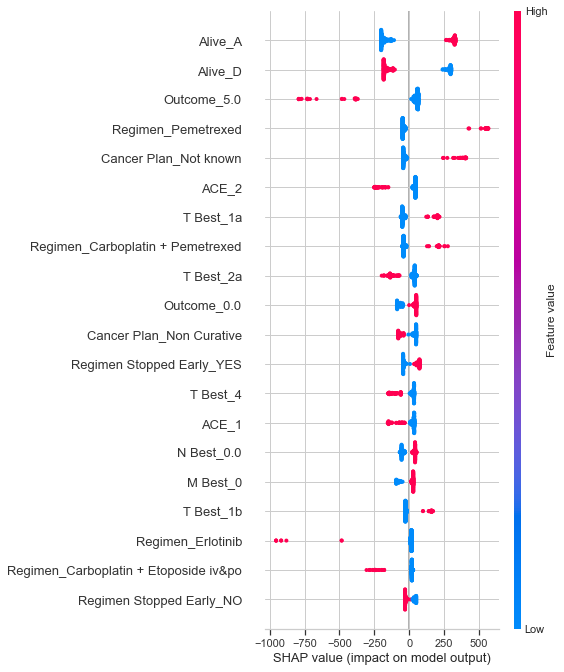

In [207]:
shap.summary_plot(shap_values, test_input_tensor,  feature_names)

In [210]:
feature_names = cat_vars
n_categories = []

for feat in feature_names[:-1]:
    n = X_cat[feat].nunique()
    n_categories.append(n)

In [211]:
new_shap_values = []
for values in shap_values:
    print(values)
    #split shap values into a list for each feature
    values_split = np.split(values , np.cumsum(n_categories))
    
    #sum values within each list
    values_sum = [sum(l) for l in values_split]
    
    new_shap_values.append(values_sum)

[ 3.83110504e+01  1.86757267e+00  3.85704398e+00  8.47913895e+01
 -2.95972180e+00 -6.86467171e+00  0.00000000e+00  2.84524059e+00
 -4.85831223e+01 -2.68017178e+01 -5.09236574e+00 -1.37673843e+02
 -8.81542492e+00  7.35954189e+00  3.62222519e+01  4.31102257e+01
  1.07751207e+01 -6.47824049e+00  1.58509073e+01  2.94658051e+01
  1.68521652e+01 -6.03853655e+00  1.08133078e+01  2.17184925e+00
 -2.64559412e+00  5.12446175e+01  7.64216423e+00  1.69972019e+01
  3.25358849e+01  2.68106709e+01  3.24774323e+01  5.83698320e+00
  5.07318802e+01 -4.35599937e+01  4.17672157e+00  1.74733620e+01
  1.31585073e+00  1.54167223e+01  4.30897856e+00 -5.54958868e+00
 -1.52466476e+00 -1.48218704e+02  4.57984047e+01 -8.10415840e+00
 -3.18902016e+01  3.31295197e+02  3.00905884e+02  1.97125378e+01
  5.62147081e-01  1.35858846e+00 -2.38569570e+00  2.16818380e+00
 -2.49938631e+00  1.52310002e+00  4.41698521e-01 -5.08986950e+00
  1.55665808e+01  2.01068954e+01  2.15490158e+02  2.50785470e+00
  6.04185677e+00 -7.32065

  8.72778147e-03 -1.39826745e-01  2.41445348e-01  2.10633636e-01]
[ 1.47880411e+00  1.56152782e+01 -1.10923302e+00 -2.13518715e+01
 -3.23748231e+00  3.13606091e+01  0.00000000e+00  2.42889953e+00
 -3.97206764e+01 -2.14266644e+01 -4.66594887e+00  2.74426250e+01
 -7.37007618e+00 -5.15594406e+01  1.77057724e+01 -4.46521645e+01
  1.06422062e+01 -4.18973732e+00 -6.62254486e+01 -7.61712570e+01
  1.06134968e+01  7.44837723e+01  1.17593050e+01  8.64645123e-01
 -1.79395733e+01 -1.03461552e+01  3.62120652e+00  6.68480444e+00
  2.64240875e+01  2.20294800e+01 -2.66390038e+01  5.13710260e+00
 -6.03840714e+01 -3.25457306e+01  3.81701303e+00  1.20900698e+01
  1.13266356e-01  1.25354290e+01  2.22468400e+00 -3.21690559e+00
 -4.06523418e+00  2.09769821e+01 -1.90646469e+02 -7.07972145e+00
 -1.88905392e+01 -1.81655716e+02 -1.64910889e+02  2.87195230e+00
  8.54491353e-01  1.99249363e+00 -2.11228204e+00  8.65856469e-01
 -1.19921970e+00 -2.38815713e+00  3.44953746e-01 -4.46632338e+00
  7.15096712e+00  1.5212

In [212]:
new_shap_values

[[38.31105041503906,
  34.95373094081879,
  -178.38335180282593,
  97.4671401977539,
  49.652100563049316,
  12.985157012939453,
  73.23838949203491,
  104.83285760879517,
  42.69163513183594,
  -7.074253439903259,
  790.419874751009,
  -72.44019269943237,
  -0.6100151538848877,
  -12.061665058135986,
  -3.2161587476730347,
  240.05942553281784,
  -88.90753877162933,
  86.59515646565706],
 [1.44150710105896,
  -47.36003923416138,
  -6.172209739685059,
  -125.48753070831299,
  -134.25475072860718,
  -77.14093905687332,
  39.45213210582733,
  -157.98890447616577,
  29.831897385418415,
  -7.314113140106201,
  -345.644347473979,
  -57.70081186294556,
  -2.0179008841514587,
  -11.069838732481003,
  -6.312294960021973,
  72.11183992028236,
  -109.42303889989853,
  11.92567440122366],
 [-4.391045093536377,
  24.336645245552063,
  -1.96929931640625,
  -161.25414657592773,
  42.33645486831665,
  12.761006474494934,
  -16.958833694458008,
  -15.598925113677979,
  40.84024691581726,
  -7.37864494

In [213]:
#replace shap values
shap_values = np.array(new_shap_values)

#replace data with categorical feature values 
new_data = np.array(X_cat)
shap_values = np.array(new_data)



In [214]:
shap_values

array([[8140.0, 'MALIGNANT', '4', ..., 200.0, 1, 'ETOPOSIDE'],
       [8140.0, 'MALIGNANT', '4', ..., 10.0, 2, 'NOT CHEMO'],
       [8140.0, 'MALIGNANT', '2a', ..., 130.0, 1, 'ETOPOSIDE'],
       ...,
       [9861.0, 'MALIGNANT', '1a', ..., 120.0, 1, 'DOCETAXEL'],
       [9861.0, 'MALIGNANT', '1a', ..., 950.0, 1, 'CARBOPLATIN'],
       [9861.0, 'MALIGNANT', '1a', ..., 330.0, 1, 'CARBOPLATIN']],
      dtype=object)

In [215]:
shap_values[664]

array([8041.0, 'MALIGNANT', '2b', 1.0, '0', 'G3', 66, 'FEMALE',
       'Non Curative', 'Y1', 9, 'A', 1.77, 75.9,
       'Cisplatin + Vinorelbine (IV)', 'Not Taking Part', 'NO', 'NO',
       'NO', 0.0, 1, 150.0, 1, 'ETOPOSIDE'], dtype=object)

In [216]:
shap.summary_plot(shap_values, test_input_tensor,  cat_vars)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [148]:
shap_values.feature_names

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [ ]:
#update feature names
shap_values.feature_names = list(X_cat.columns)

# SHAP (XGBoost)

In [265]:
explainer = shap.Explainer(xgb_r)
shap_values = explainer(X_test)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=5000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0, reg_lambda=1, ...)

In [266]:
shap.summary_plot(shap_values, max_display = 100)

In [161]:
shap_values.values

array([[ 9.94860992e+01, -6.47084999e+00,  3.50766640e+01, ...,
         0.00000000e+00, -4.25423059e-05,  3.36536148e-04],
       [-9.27819920e+00, -4.87451134e+01, -7.22855759e+01, ...,
         0.00000000e+00, -4.81403877e-05, -2.99871387e-03],
       [ 4.56257439e+01, -3.23180733e+01,  5.72106743e+01, ...,
         0.00000000e+00, -5.90897471e-05, -4.84474748e-03],
       ...,
       [ 1.23143654e+02,  4.28032913e+01,  2.38431854e+01, ...,
         0.00000000e+00, -5.48213648e-05,  4.48365659e-02],
       [ 1.03827698e+02, -1.82451839e+01, -2.08892765e+01, ...,
         0.00000000e+00, -4.12601112e-05, -3.10798944e-03],
       [ 8.04545822e+01,  7.43990555e+01,  3.50428772e+01, ...,
         0.00000000e+00, -4.27757914e-05, -1.06181402e-03]], dtype=float32)

In [199]:
feature_names = cat_vars
n_categories = []

for feat in feature_names[:-1]:
    n = X_cat[feat].nunique()
    n_categories.append(n)

In [74]:
new_shap_values = []
for values in shap_values.values:
    
    #split shap values into a list for each feature
    values_split = np.split(values , np.cumsum(n_categories))
    
    #sum values within each list
    values_sum = [sum(l) for l in values_split]
    
    new_shap_values.append(values_sum)

In [75]:
#replace shap values
shap_values.values = np.array(new_shap_values)

#replace data with categorical feature values 
new_data = np.array(X_cat)
shap_values.data = np.array(new_data)

#update feature names
shap_values.feature_names = list(X_cat.columns)

In [151]:
shap_values.feature_names

['Morph',
 'Age',
 'Height',
 'Weight',
 'Cycle',
 'Dose Administration',
 'Behaviour_MALIGNANT',
 'T Best_0',
 'T Best_1a',
 'T Best_1b',
 'T Best_2',
 'T Best_2a',
 'T Best_2b',
 'T Best_3',
 'T Best_4',
 'N Best_0.0',
 'N Best_1.0',
 'N Best_2.0',
 'N Best_3.0',
 'M Best_0',
 'M Best_1',
 'M Best_1a',
 'M Best_1b',
 'Grade_G1',
 'Grade_G2',
 'Grade_G3',
 'Grade_G4',
 'Grade_GX',
 'Sex_FEMALE',
 'Sex_MALE',
 'Cancer Plan_Curative',
 'Cancer Plan_No active treatment',
 'Cancer Plan_Non Curative',
 'Cancer Plan_Not known',
 'CNS_99',
 'CNS_NI',
 'CNS_NN',
 'CNS_Y1',
 'CNS_Y1m',
 'CNS_Y2',
 'ACE_0',
 'ACE_1',
 'ACE_2',
 'ACE_3',
 'ACE_9',
 'Regimen_CARBOPLATIN + ETOPOSIDE',
 'Regimen_CARBOPLATIN + GEMCITABINE',
 'Regimen_CARBOPLATIN + VINORELBINE',
 'Regimen_CAV',
 'Regimen_CERITINIB',
 'Regimen_CISPLATIN + ETOPOSIDE',
 'Regimen_CISPLATIN + VINORELBINE',
 'Regimen_CRIZOTINIB',
 'Regimen_Capecitabine',
 'Regimen_Carboplatin + Etoposide IV 3 day',
 'Regimen_Carboplatin + Etoposide iv&po',

IndexError: list index out of range

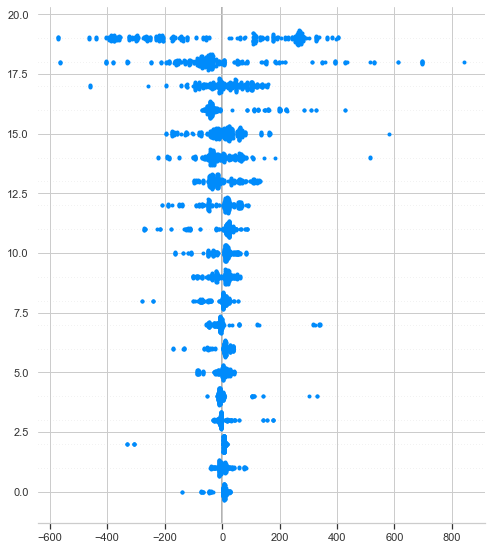

In [152]:
shap.summary_plot(shap_values, feature_names, feature_names)

In [153]:
shap.plots.beeswarm(shap_values)

In [222]:
def combine_one_hot(shap_values, name, mask, return_original=True):
    """  shap_values: an Explanation object
          name: name of new feature
          mask: bool array same lenght as features

         This function assumes that shap_values[:, mask] make up a one-hot-encoded feature
    """
    mask = np.array(mask)
    mask_col_names = np.array(shap_values.feature_names, dtype='object')[mask]

    sv_name = shap.Explanation(shap_values.values[:, mask],
                               feature_names=list(mask_col_names),
                               data=shap_values.data[:, mask],
                               base_values=shap_values.base_values,
                               display_data=shap_values.display_data,
                               instance_names=shap_values.instance_names,
                               output_names=shap_values.output_names,
                               output_indexes=shap_values.output_indexes,
                               lower_bounds=shap_values.lower_bounds,
                               upper_bounds=shap_values.upper_bounds,
                               main_effects=shap_values.main_effects,
                               hierarchical_values=shap_values.hierarchical_values,
                               clustering=shap_values.clustering,
                               )

    new_data = (sv_name.data * np.arange(sum(mask))).sum(axis=1).astype(int)

    svdata = np.concatenate([
        shap_values.data[:, ~mask],
        new_data.reshape(-1, 1)
    ], axis=1)

    if shap_values.display_data is None:
        svdd = shap_values.data[:, ~mask]
    else:
        svdd = shap_values.display_data[:, ~mask]

    svdisplay_data = np.concatenate([
        svdd,
        mask_col_names[new_data].reshape(-1, 1)
    ], axis=1)

    new_values = sv_name.values.sum(axis=1)
    svvalues = np.concatenate([
        shap_values.values[:, ~mask],
        new_values.reshape(-1, 1)
    ], axis=1)
    svfeature_names = list(np.array(shap_values.feature_names)[~mask]) + [name]

    sv = shap.Explanation(svvalues,
                          base_values=shap_values.base_values,
                          data=svdata,
                          display_data=svdisplay_data,
                          instance_names=shap_values.instance_names,
                          feature_names=svfeature_names,
                          output_names=shap_values.output_names,
                          output_indexes=shap_values.output_indexes,
                          lower_bounds=shap_values.lower_bounds,
                          upper_bounds=shap_values.upper_bounds,
                          main_effects=shap_values.main_effects,
                          hierarchical_values=shap_values.hierarchical_values,
                          clustering=shap_values.clustering,
                          )
    if return_original:
        return sv, sv_name
    else:
        return sv

https://gist.github.com/peterdhansen/ca87cc1bfbc4c092f0872a3bfe3204b2

In [231]:
shap_values = combine_one_hot(shap_values, "Behaviour", ["Behaviour" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "T Best", ["T Best" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "N Best", ["N Best" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "M Best", ["M Best" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Grade", ["Grade" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Sex", ["Sex" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Cancer Plan", ["Cancer Plan" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "CNS", ["CNS" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "ACE", ["ACE" in n for n in shap_values.feature_names], False)



In [233]:
len(shap_values.feature_names)

58

In [230]:
shap_values = combine_one_hot(shap_values, "Regimen", ["Regimen" in n for n in shap_values.feature_names], False)

IndexError: index 87 is out of bounds for axis 0 with size 40

In [232]:
shap_values = combine_one_hot(shap_values, "Clinical Trial", ["Clinical Trial" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Chemo Radiation", ["Chemo Radiation" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Regimen Time Delay", ["Regimen Time Delay" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Regimen Stopped Early", ["Regimen Stopped Early" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Cancer Plan", ["Cancer Plan" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Outcome", ["Outcome" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Administration Route", ["Administration Route" in n for n in shap_values.feature_names], False)
shap_values = combine_one_hot(shap_values, "Drug Group", ["Drug Group" in n for n in shap_values.feature_names], False)


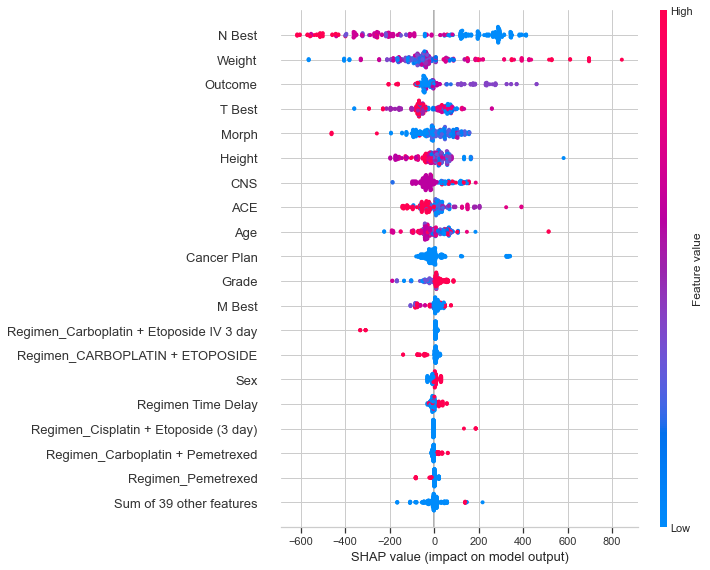

In [234]:
shap.plots.beeswarm(shap_values, max_display=20)

# LIME (XGBoost)

In [235]:
import lime
import lime.lime_tabular

In [236]:
X_train.columns.tolist()

['Morph',
 'Age',
 'Height',
 'Weight',
 'Cycle',
 'Dose Administration',
 'Behaviour_MALIGNANT',
 'T Best_0',
 'T Best_1a',
 'T Best_1b',
 'T Best_2',
 'T Best_2a',
 'T Best_2b',
 'T Best_3',
 'T Best_4',
 'N Best_0.0',
 'N Best_1.0',
 'N Best_2.0',
 'N Best_3.0',
 'M Best_0',
 'M Best_1',
 'M Best_1a',
 'M Best_1b',
 'Grade_G1',
 'Grade_G2',
 'Grade_G3',
 'Grade_G4',
 'Grade_GX',
 'Sex_FEMALE',
 'Sex_MALE',
 'Cancer Plan_Curative',
 'Cancer Plan_No active treatment',
 'Cancer Plan_Non Curative',
 'Cancer Plan_Not known',
 'CNS_99',
 'CNS_NI',
 'CNS_NN',
 'CNS_Y1',
 'CNS_Y1m',
 'CNS_Y2',
 'ACE_0',
 'ACE_1',
 'ACE_2',
 'ACE_3',
 'ACE_9',
 'Regimen_CARBOPLATIN + ETOPOSIDE',
 'Regimen_CARBOPLATIN + GEMCITABINE',
 'Regimen_CARBOPLATIN + VINORELBINE',
 'Regimen_CAV',
 'Regimen_CERITINIB',
 'Regimen_CISPLATIN + ETOPOSIDE',
 'Regimen_CISPLATIN + VINORELBINE',
 'Regimen_CRIZOTINIB',
 'Regimen_Capecitabine',
 'Regimen_Carboplatin + Etoposide IV 3 day',
 'Regimen_Carboplatin + Etoposide iv&po',

In [237]:
num_vars = ["Height","Weight","Morph","Age","Cycle","Dose Administration"]
cat_vars = X_train.columns.tolist()
for var in num_vars:
    cat_vars.remove(var)
cat_vars

['Behaviour_MALIGNANT',
 'T Best_0',
 'T Best_1a',
 'T Best_1b',
 'T Best_2',
 'T Best_2a',
 'T Best_2b',
 'T Best_3',
 'T Best_4',
 'N Best_0.0',
 'N Best_1.0',
 'N Best_2.0',
 'N Best_3.0',
 'M Best_0',
 'M Best_1',
 'M Best_1a',
 'M Best_1b',
 'Grade_G1',
 'Grade_G2',
 'Grade_G3',
 'Grade_G4',
 'Grade_GX',
 'Sex_FEMALE',
 'Sex_MALE',
 'Cancer Plan_Curative',
 'Cancer Plan_No active treatment',
 'Cancer Plan_Non Curative',
 'Cancer Plan_Not known',
 'CNS_99',
 'CNS_NI',
 'CNS_NN',
 'CNS_Y1',
 'CNS_Y1m',
 'CNS_Y2',
 'ACE_0',
 'ACE_1',
 'ACE_2',
 'ACE_3',
 'ACE_9',
 'Regimen_CARBOPLATIN + ETOPOSIDE',
 'Regimen_CARBOPLATIN + GEMCITABINE',
 'Regimen_CARBOPLATIN + VINORELBINE',
 'Regimen_CAV',
 'Regimen_CERITINIB',
 'Regimen_CISPLATIN + ETOPOSIDE',
 'Regimen_CISPLATIN + VINORELBINE',
 'Regimen_CRIZOTINIB',
 'Regimen_Capecitabine',
 'Regimen_Carboplatin + Etoposide IV 3 day',
 'Regimen_Carboplatin + Etoposide iv&po',
 'Regimen_Carboplatin + Pemetrexed',
 'Regimen_Carboplatin + Vinorelbine 

In [264]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names=X_train.columns, categorical_features=cat_vars, verbose=True, mode='regression')
i = 123
exp = explainer.explain_instance(X_test.iloc[i], xgb_r.predict, num_features=10)
exp.show_in_notebook(show_table=True)

Intercept 1632.855942439215
Prediction_local [686.89866301]
Right: 790.0716


In [265]:
i

123